# Изучение рынка заведений общественного питания Москвы

- Автор: Егорова Ольга

Инвесторы из фонда Shut Up and Take My Money решили открыть заведение общественного питания в Москве. Формат заведения (кафе, ресторан или бар), расположение, меню и цены пока тоже обсуждаются.  

Заказчик просит провести исследовательский анализ рынка Москвы. Эти результаты помогут в выборе подходящего инвесторам места.

## Цели и задачи проекта

**Цель:** провести исследовательский анализ рынка заведений общественного питания Москвы.  

**Задачи**:   
- познакомиться с предоставленными данными;
- проверить их корректность и провести предобработку данных;
- сформировать выводы.

## Описание данных
Источники информации о заведениях общественного питания Москвы - сервисы Яндекс Карты и Яндекс Бизнес.  
Актуальность информации - лето 2022 года.

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:  
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    * `0` — заведение не является сетевым;
    * `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    * «Средний счёт: 1000–1500 ₽»;
    * «Цена чашки капучино: 130–220 ₽»;
    * «Цена бокала пива: 400–600 ₽». и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## Содержание проекта
1. Загрузка данных и знакомство с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации

## Загрузка данных и знакомство с ними

Загрузим необходимые библиотеки для анализа данных и данные датасетов `rest_info.csv` и `rest_price.csv`. Затем выведем основную информацию о данных с помощью метода `info()` и первые строки датафрейма с помощью метода `head()`.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from phik import phik_matrix 

In [2]:
# Выгружаем данные в переменные info_df и price_df
url1 = 'https://drive.google.com/uc?export=download&id=1V1pE2H0JHbEx-vu9dXabdiCxnr_h-RpG'
url2 = 'https://drive.google.com/uc?export=download&id=10adM-8-gQUO6HN5cGwTtQ5Hi9xvTRDjq'

info_df = pd.read_csv(url1)
price_df = pd.read_csv(url2)

In [3]:
# Выводим первые строки датафрейма info_df на экран
info_df.head() 

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме info_df
info_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# Выводим базовые статистики всех столбцов датафрейма info_df
info_df.describe(include='all') 

,id,name,category,address,district,hours,rating,chain,seats
count,8406,8406,8406,8406,8406,7870,8406.000000,8406.000000,4795.000000
unique,8406,5614,8,5753,9,1307,NaN,NaN,NaN
top,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,Кафе,кафе,"Москва, проспект Вернадского, 86В",Центральный административный округ,"ежедневно, 10:00–22:00",NaN,NaN,NaN
freq,1,189,2378,28,2242,759,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.229895,0.381275,108.421689
std,NaN,NaN,NaN,NaN,NaN,NaN,0.470348,0.485729,122.833396
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.100000,0.000000,40.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,0.000000,75.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.400000,1.000000,140.000000


Столбец `id` имеет только уникальные значения, при этом он не содержит никакой ценности для анализа.  
Количество уникальных названий `name` значительно меньше их общего количества, вероятно это связано с сетевыми заведениями или просто случайное совпадение названий. Однако стоит учитывать и вариант некачественного внесения информации, например, самым популярным названием является 'Кафе'.  
Столбец `district` содержит избыточную текстовую информацию 'административный округ', она может мешать при оформлении визуализаций.  
Стоит обратить внимание корректность заполнения столбца `seats`. Минимальное значение в столбце равное '0', что может говорить об отсутствии посадочных мест, когда еда готовится только 'на вынос' или ошибка при внесении данных.

In [6]:
# Выводим первые строки датафрейма price_df
price_df.head() 

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме price_df
price_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [8]:
# Выводим базовые статистики всех столбцов датафрейма price_df
price_df.describe(include='all') 

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
count,4058,3315,3816,3149.000000,535.000000
unique,4058,4,897,NaN,NaN
top,045780ada3474c57a2112e505d74b633,средние,Средний счёт:1000–1500 ₽,NaN,NaN
freq,1,2117,241,NaN,NaN
mean,NaN,NaN,NaN,958.053668,174.721495
std,NaN,NaN,NaN,1009.732845,88.951103
min,NaN,NaN,NaN,0.000000,60.000000
25%,NaN,NaN,NaN,375.000000,124.500000
50%,NaN,NaN,NaN,750.000000,169.000000
75%,NaN,NaN,NaN,1250.000000,225.000000


Столбец `id`  - аналогично предыдущему датафрейму.  
В столбце `middle_avg_bill`есть пропуски и нулевые значения. Необходимо разобраться является ли нулевое значение индикатором или нет. Максимальный средний чек в 35000 руб. хоть и выглядет вполне реально, например при оплате банкета, однако он может сильно исказить результаты анализа.  
В столбце `middle_coffee_cup` максимальный чек 1568 руб ?! - возможно для Москвы это допустимо.  

---

### Промежуточный вывод

**Датафрейм ` info_df`**  
- содержит 9 столбцов и 8406 строк;
- названия столбцов корректные вида `snake_case`;
- столбцов со строковыми данными (object) - 6;
- столбцов с числовыми значениями с плавающей запятой (float64) - 2;
- столбцов с целочисленными значениями (int64) - 1;
- количество уникальных значений в `id` совпадает с количеством строк, значит они не повторяются;
- количество уникальных значений в `name` 5614 - меньше чем количество строк, значит названия повторяются, что естественно для сетевых заведений;
- количество уникальных значений в `address` 5753- меньше чем количество строк, это допустимо ведь по одному адресу могут находиться несколько заведений;
- пропуски содержатся в двух столцах: `hours` и `seats`;
- типы данных определены корректно, кроме:
    - столбца `seats`. Количество посадочных мест может быть представлено только целым числом, поэтому потребуется преобразование к целочисленному типу (при этом нужно учесть, что в столбце есть пропуски),
    - столбца `chain`. Значения столбца ограничены `0` и `1`, поэтому потребуется преобразование к типу `bool`;
- разрядность столбцов с числовыми данными можно отпимизировать.
- удалить избыточную информацию из столбца`district`;
- разобраться с нулевыми значениями столбца `seats`.
     
**Датафрейм `price_df`**  
- содержит 5 столбцов и 4058 строк;
- названия столбцов корректные вида `snake_case`;
- количество уникальных значений в `id` совпадает с количеством строк, значит они не повторяются;
- столбцов со строковыми данными (object) -  3;
- столбцов с числовыми значениями с плавающей запятой (float64) - 2;
- пропуски содержатся во всех столбцах, кроме столбца `id`; больше всего пропусков в столбце `middle_coffee_cup`
- типы данных определены корректно;
- разрядность столбцов с числовыми данными можно оптимизировать;
- исследовать выбросы `middle_avg_bill` и `middle_coffee_cup`;
- исследовать нулевые значения в `middle_avg_bill` 

После объединения датафреймов можно удалить столбец `id`

## Подготовка единого датафрейма

Объединим два датафрейма столбцу `id`. Чтобы сохранить данные о всех заведениях объединим датафреймы с параметром `how='left'`:

In [9]:
# Соединяем данные в единый датафрейм df
total_df = info_df.merge(price_df, on='id', how='left')

In [10]:
# Удаляем неинформативный столбец 'id'
df = total_df.drop(['id'], axis=1)

In [11]:
# Выводим информацию об объединенном датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   rating             8406 non-null   float64
 6   chain              8406 non-null   int64  
 7   seats              4795 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 788.2+ KB


В результате в новом датафрейме `df` сохранены все заведения. Датафрей состоит из 8406 строк и 12 столбцов. 

## Предобработка данных

Подготовим данные к исследовательскому анализу:

### Оптимизируем типы данных

На этапе знакомства с данными было отмечено, что столбцы `seats`и `chain`имеют некорректные типы данных. Здесь же уменьшим разрядность столбцов с типом данных `float64`

In [12]:
# Преобразуем 'seats' к типу Int
df['seats'] = df['seats'].astype('Int16')

In [13]:
# Преобразуем 'chain' к типу bool
df['chain'] = df['chain'].astype('bool')

In [14]:
# Уменьшим разрядность 'rating', 'middle_avg_bill', 'middle_coffee_cup'
for col in ['rating', 'middle_avg_bill', 'middle_coffee_cup']:
    df[col] = pd.to_numeric(df[col], downcast='float')

Проверим результат:

In [15]:
# Выводим информацию об объединенном датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   rating             8406 non-null   float32
 6   chain              8406 non-null   bool   
 7   seats              4795 non-null   Int16  
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float32
 11  middle_coffee_cup  535 non-null    float32
dtypes: Int16(1), bool(1), float32(3), object(7)
memory usage: 591.2+ KB


Все корректно. Типы данных преобразованы

### Изучим пропуски

Датафрейм содержит пропущенные значения в столбцах `hours`,`seats`,`price`, `avg_bill`,`middle_avg_bill` и `middle_coffee_cup` Узнаем абсолютное и относительное количество пропусков в них.

In [16]:
# Применяем метод isna() к датафрейму df и выводим абсолютные значения пропусков
print('Пропуски в столбцах (абсолютные значения):')
df[['hours', 'seats','price', 'avg_bill','middle_avg_bill','middle_coffee_cup']].isna().sum() 

Пропуски в столбцах (абсолютные значения):


hours                 536
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [17]:
print('Общее количество пропусков в датафрейме:')
(df.isna().sum()).sum()

Общее количество пропусков в датафрейме:


26956

In [18]:
# Выводим относительное количество пропусков
print('Пропуски в столбцах (относительные значения, в %):')
df[['hours', 'seats','price', 'avg_bill','middle_avg_bill','middle_coffee_cup']].isna().mean() * 100

Пропуски в столбцах (относительные значения, в %):


hours                 6.376398
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

<img src="https://cdn-icons-png.flaticon.com/512/7444/7444512.png" width="20" height="20"> **Выводы о причинах появления пропусков в столбцах датафрейма, возможных последствиях и способах их обработки**

1. **В столбце `hours`** с режимом работы меньше всего пропусков, их 536 (6,4%). 
3. **В столбце `seats`** с данными о количестве посадочных мест почти 43% пропусков (3611).
   
    Скорее всего эти поля были не обязательными для заполнения и данные просто не были внесены. Корректно заполнить пропуски в `hours` и  `seats` какими-либо конкретными значениями не представляется возможным, замена на индикаторы не имеет смысла, а при удалении потеряется большой объем информации. Оставим пропуски как есть.  

6. **В столбце `price`** с информацией о категории цен почти 60,6% пропусков (5091). Вероятно это поле также было не обязательно к заполнению.
    Попробуем проанализировать возможные значения в столбце `price`, может быть есть категория 'нет данных'. В этом случае пропуски можно заполнить этим индикатором. Можно попытаться заполнить пропуски на основе данных столбца `middle_avg_bill`. В случае невозможности восстановления данных оставить пропуски без изменения.
8.  **В столбце `avg_bill`** с информацией о средней стоимости заказа пропусков - 54,6% (4590).
    - Проанализировать соответствующие значения в столбце `middle_avg_bill` и в `middle_coffee_cup`, возможно получится восстановить данные. В противном случае оставить пропуски без изменения
9. **В столбцах `middle_avg_bill`** с оценкой среднего чека 62,5% пропусков (5257). **В столбце `middle_coffee_cup`** с оценкой чашки капучино больше всего пропусков - 93,6% пропусков(7871). Вероятно значения этих столбцов должны были заполняться автоматически на основе данных столбца `avg_bill`. При этом поле `avg_bill` может содержать либо данные среднего счёта, либо данные стоимости чашки капучино, либо стоимость кружки пива. Этим вероятно можно объяснить большое количество пропусков в столбце `middle_coffee_cup`, т.е. поле `avg_bill` либо содержит пропуски либо информацию не о капучино. С другой стороны можно предположить, что данные в `avg_bill` записаны некорректно(с ошибкой) и автоматического заполнения столбцов не произошло. Попробуем проанализировать соответствующие значения в столбце `avg_bill`, возможно получится восстановить данные. В противном случае оставить пропуски без изменения.  
При необходимости пропуски в столбцах будем фильтровать.

#### Пропуски в столбце `avg_bill`

На основе данных столбца `avg_bill` заполнены столбцы `middle_avg_bill` и `middle_coffee_cup`:  
- Если значение из столбца `avg_bill` содержит подстроку "Средний чек", то в столбец `middle_avg_bill` либо войдет медиана значений или само значение указанное в `avg_bill`, в противном случае ничего не войдет. 
- Аналогично для `middle_coffee_cup`. Если значение из столбца `avg_bill` содержит подстроку «Цена одной чашки капучино», то в столбец `middle_coffee_cup` войдет медиана значений или само значение указанное в `avg_bill`, в противном случае ничего не войдет.

Предположим, что произошел технический сбой и значения из `avg_bill` частично были удалены, при этом в двух других столбцах  `middle_avg_bill` и `middle_coffee_cup` они сохранились. Попробуем подтвердить или опровергнуть гипотезу. Если она подтвердится, то возможно получится заполнить пропуски в `avg_bill`. Если нет, то других вариантов корректно заполнить пропуски в `avg_bill` нет и оставим их без изменений.

In [19]:
# Отфильтруем строки датафрейма с пропусками столбце 'avg_bill' и без пропусков в 'middle_avg_bill'
df[(df['avg_bill'].isna()) & (df['middle_avg_bill'].notna())]

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


In [20]:
# Отфильтруем строки датафрейма с пропусками столбце 'avg_bill' и без пропусков в 'middle_coffee_cup'
df[(df['avg_bill'].isna()) & (df['middle_coffee_cup'].notna())]

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


В датафрейме нет таких строк, поэтому наша гипотеза не подтвердилась. Оставим пропуски в столбце `avg_bill`  без изменений.

#### Пропуски в столбцах `middle_avg_bill` и `middle_coffee_cup`

Значения столбцов `middle_avg_bill` и `middle_coffee_cup` зависят от данных столбца `avg_bill`. 
- Проверим совпадает ли количество значений в столбце `middle_avg_bill` с количеством значений столбца `avg_bill` имеющих подстроку ~"Средний счёт"~ "счёт". Поскольк мы не знаем каким образом вносилась информация на сервис, то проверим подстроку именно "счёт", а не "Средний счёт" - тем самым мы сможем выявить ошибки (если они есть) в написании фразы, например "средний счёт", "Ср. счёт" и т.д.
- Аналогично для `middle_coffee_cup`. Совпадает ли количество значений в столбце `middle_coffee_cup` с количеством значений столбца `avg_bill` имеющих подстроку ~"Цена одной чашки капучино"~ "капучино".
- Здесь же проверим количество значений, с ключевым словом "пива".
  
Это поможет определить все ли значения из  `avg_bill` с соответствующими подстроками попали столбцы `middle_avg_bill` и `middle_coffee_cup`.
Если столбцы окажутся корректно заполненными, значит пропуски не случайны и они объясняются данными столбца `avg_bill`. В этом случае оставим пропуски без изменений. Если же столбцы окажутся некорректно заполненными, попробуем восстановить данные в них.

In [21]:
#Выводим количество строк датафрейма в зависимости от содержания подстроки
print('Количество значений в столбце avg_bill: ', df['avg_bill'].count())
print('- из них содержащих "счёт":', df['avg_bill'].str.contains('счёт').sum())
print('- из них содержащих "капучино":', df['avg_bill'].str.contains('капучино').sum())
print('- из них содержащих "пива":', df['avg_bill'].str.contains('пива').sum())
print()
print('Количество значений в столбце middle_avg_bill: ', df['middle_avg_bill'].count())
print('Количество значений в столбце middle_coffee_cup: ', df['middle_coffee_cup'].count())

Количество значений в столбце avg_bill:  3816
- из них содержащих "счёт": 3149
- из них содержащих "капучино": 535
- из них содержащих "пива": 132

Количество значений в столбце middle_avg_bill:  3149
Количество значений в столбце middle_coffee_cup:  535


Итак, все данные с подстрокой "счёт" из столбца `avg_bill`  попали в столбец `middle_coffee_cup` и все данные с подстрокой "капучино" из столбца `avg_bill`  попали в столбец `middle_coffee_cup`. Сумма строк с ключевыми словами "счёт", "капчино", "пива" совпадает с количеством строк поля `avg_bill`, то есть никаких других вариантов ключевых слов, наприме "счет" через "е", нет. Таким образом, данные корректны, пропуски оставляем без изменения.

* Здесь напомним, что в столбце `middle_avg_bill` есть нулевые значения, значит если заполнение шло по описанному выше сценарию, то столбец `avg_bill` должен содержать строку  "Средний счёт: 0 руб".

In [22]:
# Выводим строки датафрейма с нулевыми значениями в столбце `middle_avg_bill`
df[df['middle_avg_bill']==0]

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
3688,Кофемания,кофейня,"Москва, улица Новый Арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",4.5,True,200,высокие,Средний счёт:от 0 ₽,0.0,NaN


Такая строка действительно есть, она одна. Возможно была ошибка при заполнении поля или умышленно указана такая стоимость. В любом случае при расчётах по этому столбцу будем фильтровать данные.  
Отметимм еще один важный момент. Поскольку в столбец `middle_avg_bill` могут попасть данные среднего счёта по нижней границе, например в случае "Средний счёт:от 100руб" в столбец попадет значение 100, то при расчётах среднего по этому полю данные могут быть занижены!

#### Пропуски в столбце `price`

In [23]:
#Выводим первые строки датафрейма с пропусками столбце price
df[df['price'].isna()].head(3)

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,<NA>,NaN,NaN,NaN,NaN
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,False,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
11,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,False,<NA>,NaN,NaN,NaN,NaN


В датафрейме есть строки, в которых значение `price` пропущено, а значение  `middle_avg_bill` нет. Попробуем восстановить данные столбца `price`. Для этого:  
- определим для каждой категории цен столбца `price` и каждой категории заведения общественного питания из столбца `category` интервалы среднего чека;
- заполним пропуски в столбце `price` на соотвутствующую категорию в зависимости от значений столбца `middle_avg_bill` и категории заведения обественного питания из столбца `category`.

Сформируем сводную таблицу и узнаем медианные значения среднего чека для каждой категории организации `category` в разрезе категории цен заведения `price`

In [24]:
# Формируем сводную таблицу
table = pd.pivot_table(df, index='category', columns='price', aggfunc='median', values='middle_avg_bill')
table = table.reset_index()
table

price,category,высокие,выше среднего,низкие,средние
0,"бар,паб",2000.0,1250.0,170.0,850.0
1,булочная,2500.0,1225.0,150.0,442.5
2,быстрое питание,3200.0,1250.0,150.0,400.0
3,кафе,2000.0,1250.0,150.0,500.0
4,кофейня,2000.0,1250.0,145.5,400.0
5,пиццерия,1900.0,1250.0,225.0,670.0
6,ресторан,2250.0,1250.0,300.0,700.0
7,столовая,3750.0,1225.0,212.5,300.0


In [25]:
# Выгружаем список уникальных категорий заведений
category_company = table['category'].unique().tolist()
category_company

['бар,паб',
 'булочная',
 'быстрое питание',
 'кафе',
 'кофейня',
 'пиццерия',
 'ресторан',
 'столовая']

In [26]:
# Составляем список категоий цен
category_price = ['низкие', 'средние', 'выше среднего', 'высокие']

# В цикле пройдемся по каждой категории компании и присвоим категорию цен 
for cat_comp in category_company:
    #Составляем список значений для категоризации
    value_price = [
    # минимальное значение столбца минус 1, т.к. нижняя граница интервала не включается
    df['middle_avg_bill'].min()-1,
    # Срез из таблицы table преобразуем в скалярное значение
    table[table['category'] == cat_comp]['низкие'].squeeze(),          
    table[table['category'] == cat_comp]['средние'].squeeze(),
    table[table['category'] == cat_comp]['выше среднего'].squeeze(),
    # максимальное значение столбца
    df['middle_avg_bill'].max()]
    # Пропущенное значение в столбце price с соотвествующей категорией организации с помoщью cut() заменяем на категорию цен
    df.loc[(df['price'].isna()) & (df['category']==cat_comp), 'price'] = pd.cut(df['middle_avg_bill'], bins=value_price, labels=category_price)

In [112]:
print('Количество пропусков в столбце price составляло: ', \
      total_df['price'].isna().sum())
print('Количество пропусков в столбце price после категоризации: ', \
      df['price'].isna().sum(), ', т.е. меньше на',  total_df['price'].isna().sum() - df['price'].isna().sum() )

Количество пропусков в столбце price составляло:  5091
Количество пропусков в столбце price после категоризации:  4618 , т.е. меньше на 473


### Явные и неявные дубликаты

- Посмотрим уникальные значения в столбцах `district`, `category`, `price` - их небольшое количество. Убедимся, что они не содержат неявных дубликатов.

In [28]:
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [29]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [30]:
df['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

Тут все корректно, дубликатов в нет.

- Значения в столбце `name` приведем к верхнему регистру и удалим возможные пробелы в начале и конце строки

In [31]:
# Приводим к верхнему регистру данные столбца name и удаляем пробелы
df['name'] = df['name'].str.upper().str.strip()

Посмотрим статистику некоторых столбцов c типом object 

In [32]:
df[['name', 'district', 'category', 'price', 'address']].describe()

,name,district,category,price,address
count,8406,8406,8406,3785,8406
unique,5512,9,8,4,5753
top,КАФЕ,Центральный административный округ,кафе,средние,"Москва, проспект Вернадского, 86В"
freq,189,2242,2378,2388,28


Самое популярное заведение "КАФЕ", которое встречается 189 раз - почему бы и нет. Хочется проверить самый популярный адрес, где по данным датафрейма расположено 28 мест общественного питания.

In [33]:
# Фильтруем строки по указанному адресу, группируем по названию и считаем количество таких названий
df[df['address'] == 'Москва, проспект Вернадского, 86В'].groupby('name')['name'].count()

name
ALY’S POKE                     1
ASIA GOURMET                   1
BỔ                           1
FIBO PASTA & RAVIOLI           1
GRAPEFRUIT                     1
I NEED DONER                   1
IKIGAI                         1
NOVA BUBBLE TEA                1
PLOV.COM                       1
RAMEN & WOK BY GAIJIN          1
SHRIMP KITCHEN                 1
АССА FOOD                      1
БУРГЕР КИНГ                    1
ВАНИЛЬНЫЙ ШПАТЕЛЬ              1
ВАФЛИ, КРЕПЫ, ДВА ЯЙЦА         1
ЕДА И НЕМЦЫ                    1
КАРТОЧЧО                       1
КУРИЦА И УТКА ПО-ГОНКОНГСКИ    1
ЛЕПИМ И ВАРИМ                  1
МЯСОЕД                         1
ПARK                           1
ПА ПА КОФЕ                     1
ПАRK ФУДХОЛЛ                   1
ПТИШУ                          1
СЫРОВАРНЯ                      1
ТАРАТОР                        1
ХАЧАПУРИДЗЕ                    1
ЮНОСТЬ                         1
Name: name, dtype: int64

Похоже, что все корректно, названия не повторяются. Судя по всему по этому адресу находится большое здание или торговый центр с 28 заведениями общественного питания.

- Проверим на наличие явных дубликатов:

In [34]:
# Выводим количество явных дубликатов
df.duplicated().sum()

0

Явных дубликатов нет

Однозначно определить заведение можно по его названию и адресу. Если по одному адресу находится 2 заведения с одинаковыми названиями, то скорее всего это дубли. Исключение могут составлять заведения со случайно совпавшими названиями, хотя вряди-ли кому-то прийдет в голову открыть по соседсту заведение с таким же названием.

In [35]:
# Выводим количество явных дубликатов двум столбцам 
df[['name', 'address']].duplicated().sum()

3

In [36]:
# Выводим эти строки, используем параметр  keep=False, чтобы вывести все повторяющиеся строки
df[df[['name', 'address']].duplicated(keep=False)]

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,MORE POKE,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,False,188,NaN,NaN,NaN,NaN
1511,MORE POKE,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,True,188,NaN,NaN,NaN,NaN
2211,РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,False,150,NaN,NaN,NaN,NaN
2420,РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,True,150,NaN,NaN,NaN,NaN
3091,ХЛЕБ ДА ВЫПЕЧКА,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,True,276,NaN,NaN,NaN,NaN
3109,ХЛЕБ ДА ВЫПЕЧКА,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,False,276,NaN,NaN,NaN,NaN


Заведение MORE POKE имеет 2 записи 1430 и 1511. ОНи отличаются форматом записи режима работы и критерием сетевое/несетевое  
Заведение РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ	 имеет 2 записи 2211 и 2420. Они различаются категорией заведения, форматом записи режима работы и критерием сетевое/несетевое  
Заведение ХЛЕБ ДА ВЫПЕЧКА имеет 2 записи 3091 и 3109. Они различаются категорией заведения, форматом записи режима работы и критерием сетевое/несетевое   
Можно поступить 2 способами:
1. Проверить количество заведений с указанными именами. Если их несколько, то заведение сетевое и тогда оставим записи с соответствующей отметкой;
2. Предположить, что записи с бОльшим номером более новые и оставить именно их.

Проверим первый вариант:

In [37]:
for i in ['MORE POKE','РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ','ХЛЕБ ДА ВЫПЕЧКА']:
    print(f'Количество {i}:', df['name'][df['name'] == i].count())

Количество MORE POKE: 3
Количество РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ: 3
Количество ХЛЕБ ДА ВЫПЕЧКА: 3


Заведения имеют еще филиалы, значит они сетевые. Удаляем записи с индексами 1430, 2211 и 3109:

In [38]:
# Удаляем записи
df.drop([1430, 2211, 3109], inplace=True)

In [39]:
# Проверим результат
df[['name', 'address']].duplicated().sum()

0

In [40]:
# Количество оставшихся строк в датафрейме
df.shape[0]

8403

Строки удалены, дубликатов больше нет.

### Дополнительное поле
Создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [41]:
#Выводим количество строк датафрейма в зависимости от содержания подстроки
print('Количество значений в столбце hours: ', df['hours'].count())
print('- из них содержащих "ежедневно":', df['hours'].str.contains('ежедневно').sum())
print('- из них содержащих "круглосуточно":', df['hours'].str.contains('круглосуточно').sum())
print()

# Для удобстава условие запишем в переменную
criteria = ('ежедневно' and 'круглосуточно') or ('круглосуточно' and 'ежедневно')
#Выводим количество строк датафрейма в зависимости от содержания подстроки
print('Количество строк содержащих "ежедневно" и "круглосуточно" в любом порядке:', df['hours'].str.contains(criteria).sum())


Количество значений в столбце hours:  7868
- из них содержащих "ежедневно": 5018
- из них содержащих "круглосуточно": 772

Количество строк содержащих "ежедневно" и "круглосуточно" в любом порядке: 772


In [42]:
# Создаем новый столбец с логическими значениями
df['is_24_7'] = df['hours'].str.contains(criteria)

In [43]:
# Проверим результат. Посмотрим на первые строки
df.head(2)

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,WOWФЛИ,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,False,<NA>,NaN,NaN,NaN,NaN,False
1,ЧЕТЫРЕ КОМНАТЫ,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False


### Обработка данных столбца `district` 

Удалим избыточную текстовую информацию значений столбца, а именно слова 'административный округ'. При постоении визуализации и подписи значений осей излишний текст будет мешать восприятию

In [44]:
# Выделяем из полного названия округа только "направление" округа
df['district']= df['district'].str.slice(0,-(len('административный округ')+1))

In [45]:
# Проверим результат. Посмотрим на первые строки
df.head(2)

,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,WOWФЛИ,кафе,"Москва, улица Дыбенко, 7/1",Северный,"ежедневно, 10:00–22:00",5.0,False,<NA>,NaN,NaN,NaN,NaN,False
1,ЧЕТЫРЕ КОМНАТЫ,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный,"ежедневно, 10:00–22:00",4.5,False,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False


Все корректно

### Обработка данных столбца `seats` 

Напомним, что в столбце `seats` почти 43% пропусков - 3611. Кроме того, столбец с количеством посадочных мест содержит нулевые значения. Посчитаем строки с нулевыми значениями и посмотрим для каких категорий заведений они встречаются:

In [46]:
# Количество строк с нулевыми значениями в столбц seats
df['seats'][df['seats'] == 0].count()

136

In [47]:
# Уникальные значения категорий для нулевых значений из seats
df['category'][df['seats'] == 0].unique()

array(['булочная', 'ресторан', 'кафе', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'столовая'], dtype=object)

Нулевые значения встречаются в каждой категории. Для части категорий "0" значения могут означать, что зведение работает только на вынос, например булочная, кофейня, быстрое питание. Вряд-ли у бара,паба, столовой, ресторана и кафе нет посадочных мест. Скорее всего это ошибки в данных. Для того, чтобы при анализе данные не искажались заменим нулевые значения пропусками. В нашем случае пропуск означает отсутствие данных.

In [48]:
# заменим нулевые значения на пропуски
df['seats'] = df['seats'].replace(0, np.nan)

In [49]:
# Проверим количество строк с нулевыми значениями в столбц seats после корректировки
print('Количество строк после корректировки: ', df['seats'][df['seats'] == 0].count())

Количество строк после корректировки:  0


Теперь в поле 'seats' нет нулевых значений

In [50]:
#Количесвто пропусков в столбце 
df['seats'].isna().sum()

3747

In [51]:
# Количество пропусков во всем датафрейме:
(df.isna().sum()).sum()

27144

---

### Промежуточный вывод

На этапе предобработке данных датафрейма `df` были проведены следующие действия:
1. Два столбца с некорректными типами данных  `seats` и `chain` приведены к типу `Int16` и `bool` соответственно, а для столбцов `rating`, `middle_avg_bill`, `middle_coffee_cup` понижена разрядность до `float32`.
2. Изучено 26956 пропуска в 6 столбцах:
- пропуски из столбцов `seats`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` оставлены без изменений в силу невозможности корректно заполнить занными;
- 470 пропусков в столбце `price` заменены на категориальные значения на основе данных датафрейма.
3. Удалено 3 неявных убликата.
4. Создан дополнительный столбец `is_24_7` на основе данных о режиме работы `hours`
5. Оптимизированы значения в столбце `district`, теперь они более компактны.
6. Нулевые значения из `seats` заменены на пропуски, чтобы эти значения не искажали статистику
  
Итого, в процессе преобразования количество строк датафрейма уменьшилось и составляет 8403. Количество пропусков 27144.


## Исследовательский анализ данных

### Определим категории заведений представленые в данных. Исследуем количество объектов общественного питания по каждой категории.

In [52]:
# Выводим уникальные значения столбца с категориями
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Посмотрим на распределение объектов общественного питания по каждой категории:

In [53]:
# Получаем количество заведений в каждой категории
# Сортируем по убыванию значений
series_category_count = df['category'].value_counts().sort_values(ascending = True)
series_category_count

category
булочная            256
столовая            315
быстрое питание     603
пиццерия            633
бар,паб             765
кофейня            1413
ресторан           2041
кафе               2377
Name: count, dtype: int64

Посмотрим как распределяются заведения общественного питания по категориям:

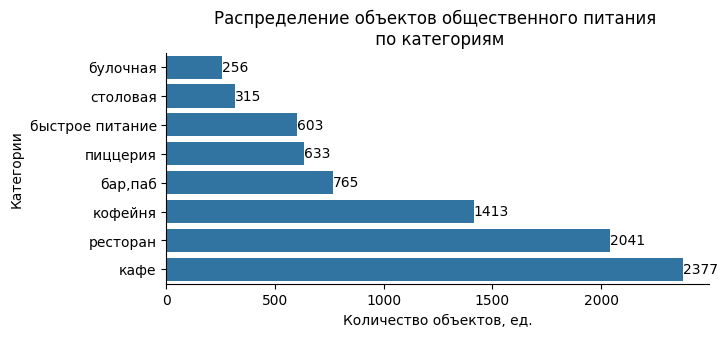

In [54]:
# Строим столбчатую диаграмму

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(7, 3))

# Параметру передадим список категорий в порядке убывания значений 
bar_category = sns.countplot(data=df,
                             y='category',
                             order=series_category_count.index)

# Настраиваем оформление графика:

# Добавляем значения к барам 
bar_category.bar_label(bar_category.containers[0])

# Убираем верхнюю и правую границы
bar_category.spines['top'].set_visible(False)
bar_category.spines['right'].set_visible(False)

# Задаем подписи осей и название
plt.xlabel('Количество объектов, ед.')
plt.ylabel('Категории')
plt.title('Распределение объектов общественного питания \n по категориям')

# Выводим график
plt.show()

In [55]:
# Получаем долю заведений в каждой категории
# Сортируем по убыванию значений и округляем до 2 знаков
series_category_share = df['category'].value_counts(normalize=True).round(2)
series_category_share

category
кафе               0.28
ресторан           0.24
кофейня            0.17
бар,паб            0.09
пиццерия           0.08
быстрое питание    0.07
столовая           0.04
булочная           0.03
Name: proportion, dtype: float64

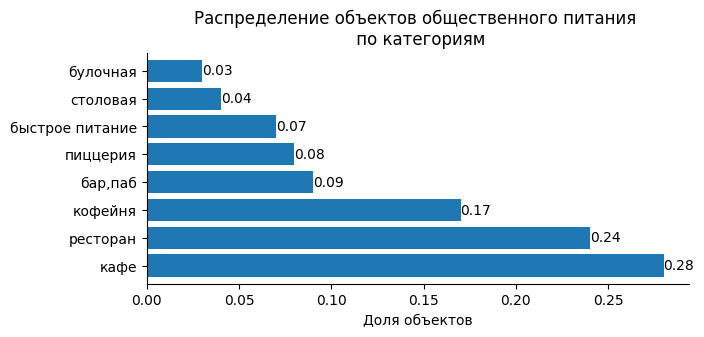

In [56]:
# Строим столбчатую диаграмму

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(7, 3))

# Увеличим толщину баров с помощью width
bar_category_share = series_category_share.plot(kind='barh', width=0.8, legend=False)

# Настраиваем оформление графика:

# Добавляем значения к барам 
bar_category_share.bar_label(bar_category_share.containers[0])

# Убираем верхнюю и правую границы
bar_category_share.spines['top'].set_visible(False)
bar_category_share.spines['right'].set_visible(False)

# Задаем подписи осей и название
plt.xlabel('Доля объектов')
plt.ylabel('')
plt.title('Распределение объектов общественного питания \n по категориям')

# Выводим график
plt.show()

Датафрейм содержит данные о заведениях общественного питания 8 категорий: ресторан, кафе, кофейня, пиццерия, бар,паб , быстрое питание, столовая и булочная.
- самая многочисленная категория 28% (2377) всех заведений - это кафе
- далее идут 24% (2041)  - рестораны и 17% (1413) - кафе,
- 9% (765) - бар,паб и 8% (633) - пиццерии,
- 7% (603) - быстрое питание и  4% (315) - столовые
- и самая маленькая группа всего 3% (256) - булочные.

### Определим какие административные районы Москвы присутствуют в данных. Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [57]:
# выводим уникальные значения  по полю с районами
df['district'].unique()

array(['Северный', 'Северо-Восточный', 'Северо-Западный', 'Западный',
       'Центральный', 'Восточный', 'Юго-Восточный', 'Южный',
       'Юго-Западный'], dtype=object)

Посмотрим на распределение категорий заведений по каждому административному округу:

In [58]:
# Сформируем сводную таблицу распределения типов заведений по всем округам
table_district = pd.pivot_table(df, columns='district', index='category', values='name', aggfunc='count')
 
# Подсветим максимальные значения
table_district.style.highlight_max()

district,Восточный,Западный,Северный,Северо-Восточный,Северо-Западный,Центральный,Юго-Восточный,Юго-Западный,Южный
category,,,,,,,,,
"бар,паб",53,50,68,63,23,364,38,38,68
булочная,25,37,39,28,12,50,13,27,25
быстрое питание,71,62,58,82,30,87,67,61,85
кафе,272,238,235,269,115,464,282,238,264
кофейня,105,150,193,159,62,428,89,96,131
пиццерия,72,71,77,68,40,113,55,64,73
ресторан,160,218,188,181,109,670,145,168,202
столовая,40,24,41,40,18,66,25,17,44


In [59]:
# выводим суммарное количество заведений для каждого административного округа
series_district = df['district'].value_counts()
series_district

district
Центральный         2242
Северный             899
Южный                892
Северо-Восточный     890
Западный             850
Восточный            798
Юго-Восточный        714
Юго-Западный         709
Северо-Западный      409
Name: count, dtype: int64

In [60]:
# выводим доли заведений для каждого административного округа
df['district'].value_counts(normalize=True).round(2)

district
Центральный         0.27
Северный            0.11
Южный               0.11
Северо-Восточный    0.11
Западный            0.10
Восточный           0.09
Юго-Восточный       0.08
Юго-Западный        0.08
Северо-Западный     0.05
Name: proportion, dtype: float64

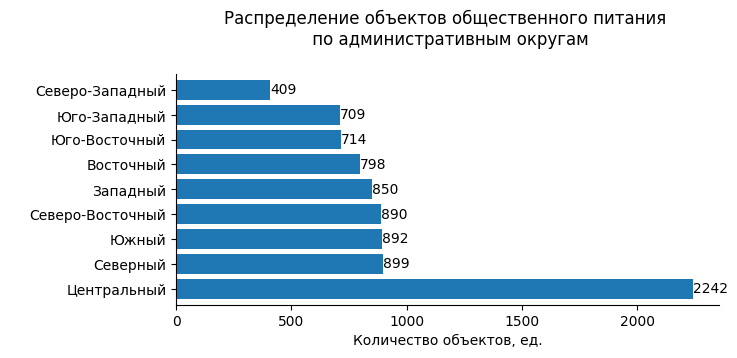

In [61]:
# Строим столбчатую диаграмму

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(7, 3))

# Увеличим толщину баров с помощью width
bar_district = series_district.plot(kind='barh', width=0.8, legend=False)

# Настраиваем оформление графика:

# Добавляем значения к барам 
bar_district.bar_label(bar_district.containers[0])

# Убираем верхнюю и правую границы
bar_district.spines['top'].set_visible(False)
bar_district.spines['right'].set_visible(False)

# Задаем подписи осей и название
plt.xlabel('Количество объектов, ед.')
plt.ylabel(' ')
plt.title('Распределение объектов общественного питания \n по административным округам\n')

# Выводим график
plt.show()

Посмотрим на распределение категорий заведений в Центральном административном округе Москвы:

In [62]:
# Фильтруем данные датафрейма
df_category_centre = df[df['district'] =='Центральный']

In [63]:
# Получаем долю каждой категории
category_centre_share = df_category_centre['category'].value_counts(normalize=True).round(2)
category_centre_share

category
ресторан           0.30
кафе               0.21
кофейня            0.19
бар,паб            0.16
пиццерия           0.05
быстрое питание    0.04
столовая           0.03
булочная           0.02
Name: proportion, dtype: float64

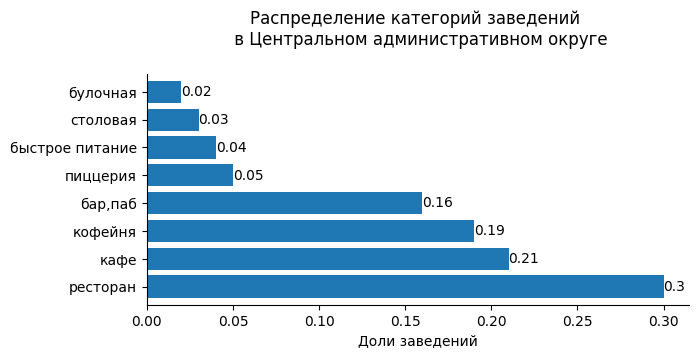

In [64]:
# Строим столбчатую диаграмму

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(7, 3))

# Увеличим толщину баров с помощью width
bar_category_centre_share = category_centre_share.plot(kind='barh', width=0.8, legend=False)

# Настраиваем оформление графика:

# Добавляем значения к барам 
bar_category_centre_share.bar_label(bar_category_centre_share.containers[0])

# Убираем верхнюю и правую границы
bar_category_centre_share.spines['top'].set_visible(False)
bar_category_centre_share.spines['right'].set_visible(False)

# Задаем подписи осей и название
plt.xlabel('Доли заведений')
plt.ylabel('')
plt.title('Распределение категорий заведений \n в Центральном административном округе\n')

# Выводим график
plt.show()


Датафрейм содержит данные о заведениях общественного питания расположенных в 9 административных районах: Северный, Северо-Восточный, Северо-Западный, Западный, Центральный, Восточный, Юго-Восточный, Южный, Юго-Западный.  
27% (2242) всех заведений Москвы (из представленных) расположены в Центральном районе. Далее со значительным отрывом идут Северный - 11% (899), Южный - 11% (892) и Северо-Восточный - 11% (890), Западный - 10% (850), Восточный - 9% (798), Юго-Восточный - 8% (714), Юго-Западный - 8% (709) и Северо-Западный -5% (409).  
Таким образом большая часть заведений сосредоточена в Центральном районе, при этом здесь представлены заведения всех категорий, но в разных долях. Самая популярная категория Центрального района - это рестораны их доля составляет 30%. Кафе, кофейни и бары, пабы - их суммарная доля 56%, остальные 14% разделяют пиццерии, быстрое питание, столовые и булочная.  
Отметим, что большая доля ресторанов характерна только для Центрального округа, в остальных округах лидирует кафе. 

### Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Определим каких заведений больше — сетевых или несетевых. Узнаем какие категории заведений чаще являются сетевыми.

In [65]:
# Группируем по столбцу 'chain' и считаем общее количество и количество уникальных названий, чтобы сетевые заведения не задвоились 
df_chain = df.groupby('chain').agg({'name':['count', 'nunique']})
df_chain

name        
      count nunique
chain              
False  5198    4800
True   3205     747

В идеале для несетевых заведений их общее количество и количество уникальных (по названию) должно было быть одинаковым. В наших данных названия 398 несетевых заведений повторяются. На этапе знакомства с данными, мы обратили внимание, что поле `name` содержит 189 повторов заведения с названием `Кафе`. Кроме того, в исходных данных есть оговорка:
> `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
> - 0 — заведение не является сетевым;
> - 1 — заведение является сетевым.

Общее количество сетевых заведений 3205, при этом количество сетей 747. 

In [66]:
# Находим доли сетевых и несетевых заведений 
df['chain'].value_counts(normalize=True).round(2)

chain
False    0.62
True     0.38
Name: proportion, dtype: float64

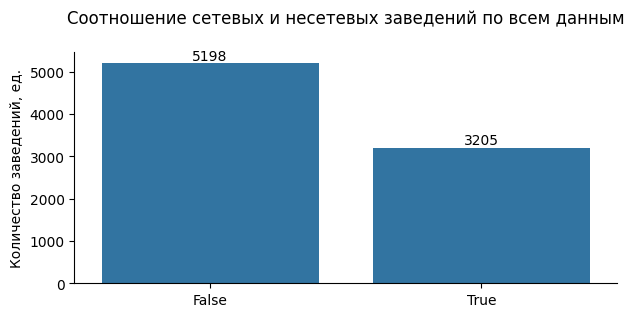

In [67]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму
bar_chain = sns.countplot(x='chain', data=df)

# Настраиваем оформление графика:

# Добавляем значения к барам
plt.bar_label(bar_chain.containers[0])

# Задаем подписи осей и название
plt.xlabel('')
plt.ylabel('Количество заведений, ед.')
plt.title('Соотношение сетевых и несетевых заведений по всем данным\n')

# Убираем верхнюю и правую границы
bar_chain.spines[['top','right']].set_visible(False)

# Выводим график
plt.show()

Найдем доли сетевых заведений для каждой категории заведений общественного питания:

In [68]:
# Сгруппируем данные
df_chain_category_share = df.groupby('category')['chain'].mean().sort_values().reset_index()
df_chain_category_share['chain'] = (df_chain_category_share['chain'] * 100).round(1)
df_chain_category_share

,category,chain
0,"бар,паб",22.1
1,столовая,27.9
2,кафе,32.8
3,ресторан,35.8
4,быстрое питание,38.5
5,кофейня,51.0
6,пиццерия,52.1
7,булочная,61.3


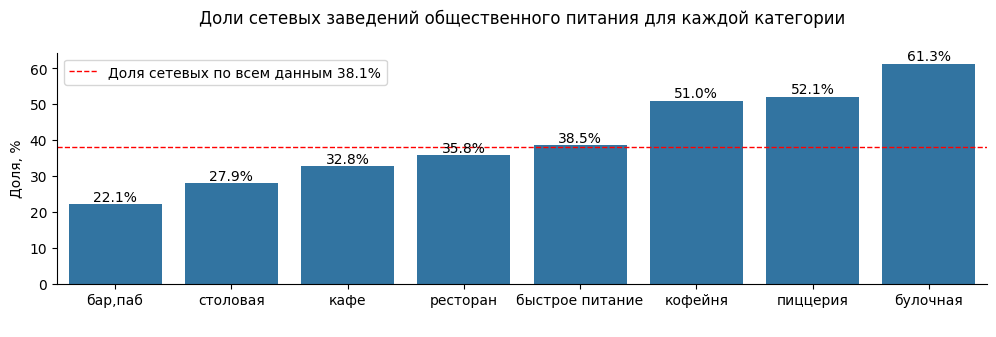

In [69]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(12, 3))

# Строим столбчатую диаграмму
bar_chain_category_share = sns.barplot(data=df_chain_category_share, x='category',y='chain')

# Рассчитываем долю сетевых по всем данным, преобразуем в проценты
mean_chain_category_share = (df['chain'].value_counts(normalize=True).iloc[1] * 100).round(1)

# Наносим на график линию с долей
plt.axhline(mean_chain_category_share, color='red', linestyle='--', linewidth=1, label=f'Доля сетевых по всем данным {mean_chain_category_share }%')

# Настраиваем оформление графика:
# Добавляем значения к барам
plt.bar_label(bar_chain_category_share.containers[0], fmt='%.1f%%')
# Задаем подписи осей и название
plt.xlabel(' ')
plt.ylabel('Доля, %')
plt.title('Доли сетевых заведений общественного питания для каждой категории\n')
# Убираем верхнюю и правую границы
bar_chain_category_share.spines[['top','right']].set_visible(False)
# Добавляем легенду
plt.legend()

# Выводим график
plt.show()


Доля сетевых заведений 38% (3205), несетевых - 62% (5198). Для большенства категорий заведений общественного питания количество несетевых в той или иной степени преобладает над сетевыми, кроме:
- доля сетевых заведений категории'булочная' превосходит несетевые и составляет 61,3%;
- доля сетевых заведений категорий 'пиццерия' и 'кофейня' сотавляет 52,1% и 51% соответственно;
При этом доли сетевых заведений этих категорий значительно превосходят средней доли по всем данным.

 - доля сетевых заведений категории'быстрое питание' составляет 38,5% и находится на уровне среднего по всем данным; 
 - чуть меньше доля сетевых 'ресторанов' и 'кафе' - 35,8 % и 32,8% соответственно;
 - меньше всего сетевых заведений встречается среди 'столовых' и'баров и пабов' -27,9% и 22,1%, их доля значительно ниже среднего по всем данным.

Общее количество сетевых заведений 3205, при этом количество сетей 747, примерно по 4 заведения нас сеть. Чаще всего сетевые заведения встречаются среди булочных, а также пиццерий и кофеен.

### Исследуем количество посадочных мест в заведениях. Определим встречаются ли в данных аномальные значения или выбросы. Для каждой категории заведений определим наиболее типичное для него количество посадочных мест.

In [70]:
# Посмотрим статистику по столбцу
df['seats'].describe()

count        4656.0
mean     111.526632
std       123.19793
min             1.0
25%            40.0
50%            78.0
75%           141.0
max          1288.0
Name: seats, dtype: Float64

Среднее значение выше медианы, значит данные асимметричны и присутствуют значения сильно выше остальных. Минимальное и максимальное значение говорит о широком разбросе.

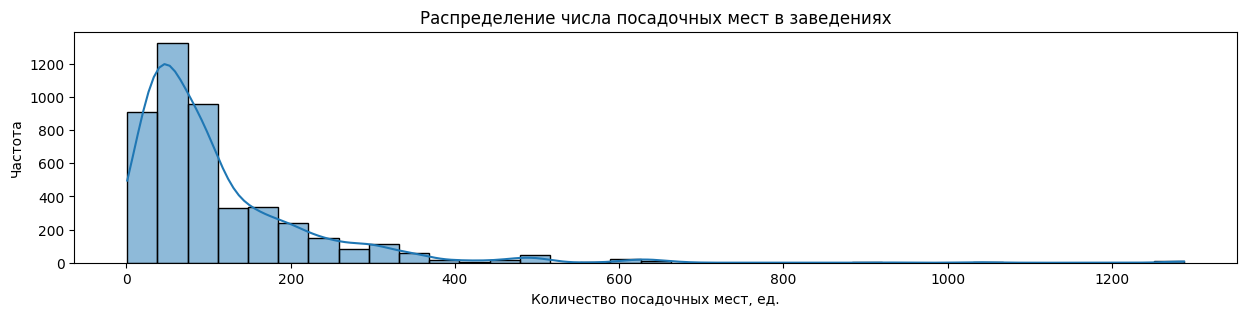

In [71]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(15, 3))

# Строим распределение данных для столбца 'seats'
sns.histplot(data=df, x='seats', bins=35, kde=True)

# Настраиваем оформление графика
plt.title('Распределение числа посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест, ед.')
plt.ylabel('Частота')
# Добавляем сетку графика
#plt.grid()

# Выводим график
plt.show()

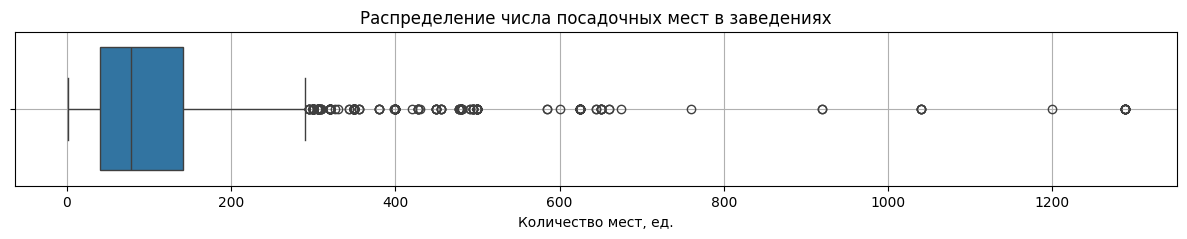

In [72]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(15, 2))

# Строим горизонтальную диаграмму размаха
sns.boxplot(df, x='seats', vert=False)

# Добавляем заголовок и подписи
plt.title('Распределение числа посадочных мест в заведениях')
plt.xlabel('Количество мест, ед.')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()

Распределение характеризуется широким разбросом и длинным «хвостом» в правой части. Однако сами значения не выглядят ошибкой, такое высокие значение числа посадочных мест вполне могут относится например к банкетным залам. Поскольку нас интересуют наиболее типичные значения, то такие высокие значения можно отнести к выбросам.  
Посмотрим на распределение без учета выбросов:

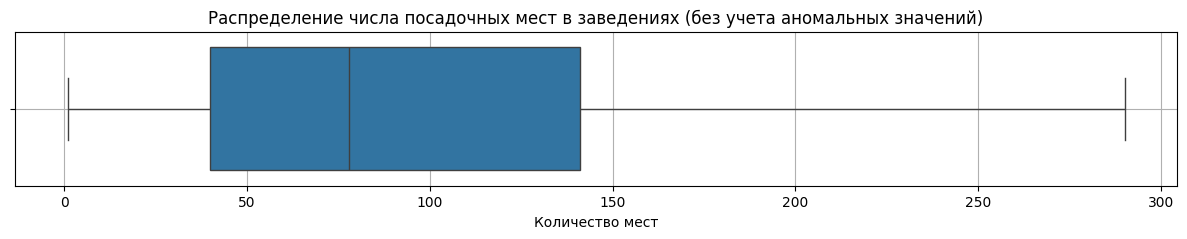

Верхний порог выбросов: 292.0


In [73]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(15, 2))

# Строим горизонтальную диаграмму размаха без выбросов
sns.boxplot(df, x='seats', showfliers=False)

# Добавляем заголовок и подписи
plt.title('Распределение числа посадочных мест в заведениях (без учета аномальных значений)')
plt.xlabel('Количество мест')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()

# Найдем границу правлго уса
data = df['seats'].dropna()
iqr = np.percentile(data, 75) - np.percentile(data, 25)
limit_seats = (np.percentile(data, 75) + 1.5 * iqr).round(0)
print('Верхний порог выбросов:', limit_seats)

Посмотрим на распределение посадочных мест для каждой категории:

In [74]:
# Получаем статистику по категориям  
df_seats_category = df.groupby('category')['seats'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])
df_seats_category

,count,mean,std,min,5%,25%,50%,75%,95%,max
category,,,,,,,,,,
"бар,паб",464.0,125.605603,145.171938,6.0,25.3,48.0,84.0,150.0,355.1,1288.0
булочная,137.0,96.562044,98.062395,3.0,7.6,35.0,52.0,130.0,278.8,625.0
быстрое питание,331.0,104.268882,106.881229,1.0,5.0,36.0,75.0,150.0,300.0,1040.0
кафе,1173.0,101.017903,118.568577,1.0,10.0,40.0,60.0,120.0,300.0,1288.0
кофейня,727.0,114.870702,128.298388,2.0,10.0,40.5,80.0,150.0,320.0,1288.0
пиццерия,417.0,96.76259,112.652861,1.0,13.6,30.0,56.0,120.0,280.8,1288.0
ресторан,1248.0,123.822917,123.854449,2.0,20.0,49.0,90.0,155.0,341.6,1288.0
столовая,159.0,102.886792,123.574555,4.0,19.5,40.0,80.0,120.0,300.0,1200.0


Построим диаграммы для каждого типа заведений и посмотрим для всех ли категорий характерны выбросы:

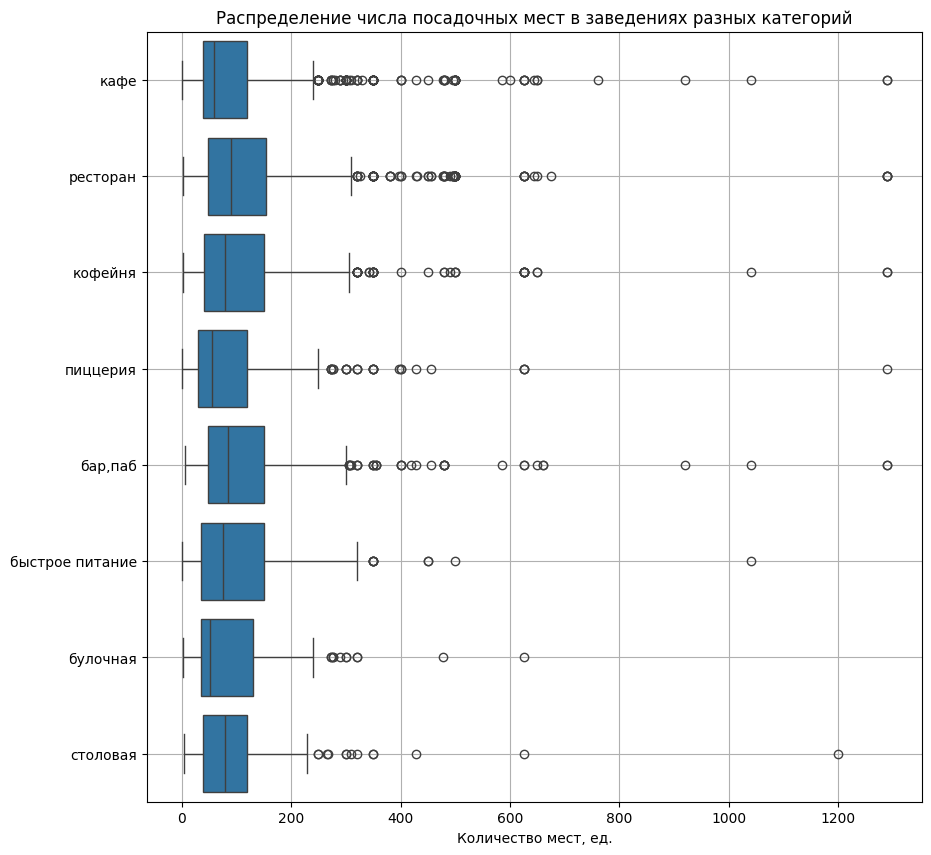

In [75]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 10))

# Строим горизонтальную диаграмму размаха
sns.boxplot(df, x='seats', y='category', vert=False)

# Добавляем заголовок и подписи
plt.title('Распределение числа посадочных мест в заведениях разных категорий')
plt.xlabel('Количество мест, ед.')
plt.ylabel('')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()

На диаграммах видно, кто каждая категория имеет экстремально высокие значения. Для некоторых категорий их немного, например быстрое питание,а для других - существенное количество.   

Посмотрим на распределение числа посадочных мест без учета выбросов:

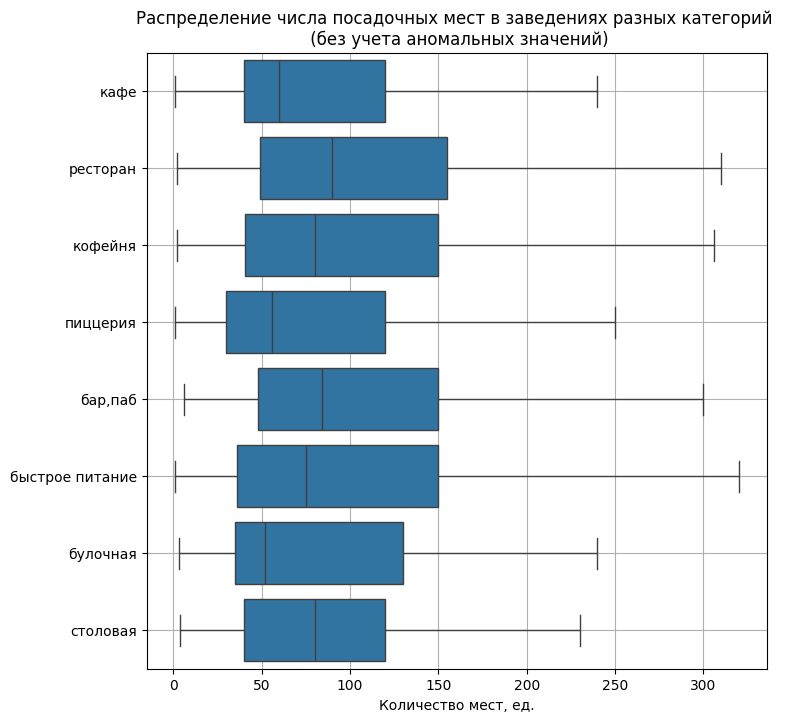

In [76]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(8, 8))

# Строим горизонтальную диаграмму размаха
sns.boxplot(df, x='seats', y='category', vert=False, showfliers=False)

# Добавляем заголовок и подписи
plt.title('Распределение числа посадочных мест в заведениях разных категорий \n (без учета аномальных значений)')
plt.xlabel('Количество мест, ед.')
plt.ylabel('')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()

Рассчитаем количество посадочных мест для каждой категории без учета экстримальных значений: 

In [77]:
# Получение значений для медианы, квартилей, минимального и максимального значения
for i in ['ресторан', 'кафе', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'столовая', 'булочная']:
    data = df[df['category']== i]['seats'].dropna()
    minimum = data.min()
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    limit_seats_upper = (np.percentile(data, 75) + 1.5 * iqr).round(0)
    print(f'{i.upper()}: посадочные места от', minimum , 'до ', limit_seats_upper)

РЕСТОРАН: посадочные места от 2 до  314.0
КАФЕ: посадочные места от 1 до  240.0
КОФЕЙНЯ: посадочные места от 2 до  314.0
ПИЦЦЕРИЯ: посадочные места от 1 до  255.0
БАР,ПАБ: посадочные места от 6 до  303.0
БЫСТРОЕ ПИТАНИЕ: посадочные места от 1 до  321.0
СТОЛОВАЯ: посадочные места от 4 до  240.0
БУЛОЧНАЯ: посадочные места от 3 до  272.0


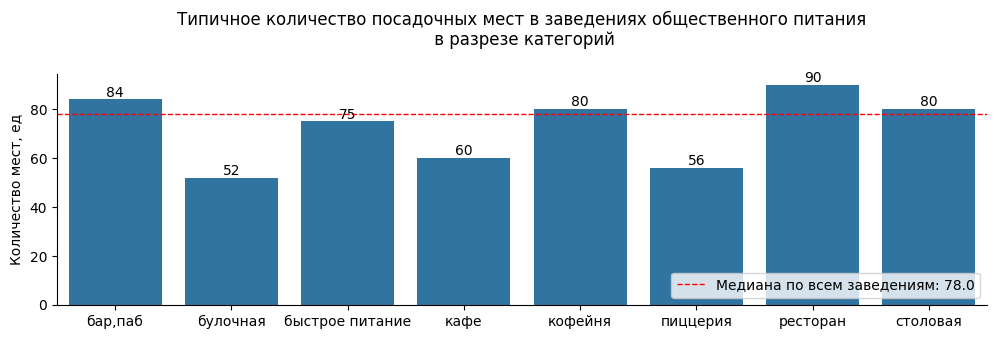

In [78]:
# Группируем по категориям и для каждой нахожим медиану  
df_seats_median = df.groupby('category')['seats'].median().reset_index()

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(12, 3))

# Строим столбчатую диаграмму
bar_category_seats = sns.barplot(data=df_seats_median, x='category', y='seats')

# Рассчитываем медианное значение количества мест по всем данным
median_seats = df['seats'].median()

# Наносим на график линию с медианным значением
plt.axhline(median_seats, color='red', linestyle='--', linewidth=1,
            label=f'Медиана по всем заведениям: {round(median_seats, 0)}')

# Настраиваем оформление графика:

# Добавляем значения к барам
bar_category_seats.bar_label(bar_category_seats.containers[0])

# Задаем подписи осей и название
plt.xlabel(' ')
plt.ylabel('Количество мест, ед')
plt.title('Типичное количество посадочных мест в заведениях общественного питания\n в разрезе категорий\n')
plt.legend(loc=4)

# Убираем верхнюю и правую границы
bar_category_seats.spines[['top','right']].set_visible(False)

# Выводим график
plt.show()

Напомним, что в поле с количеством посадочных мест 3747 пропусков. При исследовании данных оставшихся 4656 заведений общественного питания определено, что количество посадочных мест в них варьируется от 1 до 1288. При этом значения выше 292 мы считаем выбросами. Медианное значение для всех заведений 78 посадочных мест и 50% данных состредоточены в интервале от 40 до 141.

При исследовании в разрезе каждой категории заведений выявлено, что для каждой категории характерны экстремальные значения. Для некоторых категорий эти значения можно объяснить, например ресторан с 1288 местами, а некоторые значения явно являются ошибками, например булочная на более чем 600 посадочных мест. 
После фильтрации выбросов интервалы количества посадочных мест сузились, однако некоторые значения все-равно сомнительны.

| Категория заведений| Посадочных мест |
|--|--|
|РЕСТОРАН|от 2 до 314|
|КАФЕ|от 1 до  240|
|КОФЕЙНЯ|от 2 до  314|
|ПИЦЦЕРИЯ|от 1 до  255|
|БАР,ПАБ|от 6 до  303|
|БЫСТРОЕ ПИТАНИЕ|от 1 до 321|
|СТОЛОВАЯ|от 4 до  240|
|БУЛОЧНАЯ|от 3 до  272|


При это медианные значения варьируются от 52 до 90 мест.  
Рестораны, бары, пабы имеют количество посадочных мест несколько больше, а именно от 8% до 15 %, чем в среднем по всем данным.  
Кофейни, столовые и быстрое питание -  здесь количество мест очень близко к медиане по всем данным.  
Для кафе, пиццерий и булочных количество посадочных мест на 20%-33% ниже, чем в среднем по всем данным.

### Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений.

Посмотрим на статистику рейтингов по каждой категории заведений:

In [79]:
# Выводим статистику
df.groupby('category')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",765.0,4.387712,0.380143,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2377.0,4.123896,0.566200,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.277282,0.372251,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2041.0,4.290348,0.413236,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0


In [80]:
# Группируем данные по категории и для каждой получим ср. значение рейтинга, округлим до 2 знаков
df_rating_category = df.groupby('category').agg({'rating':'mean'}).round(2).reset_index()

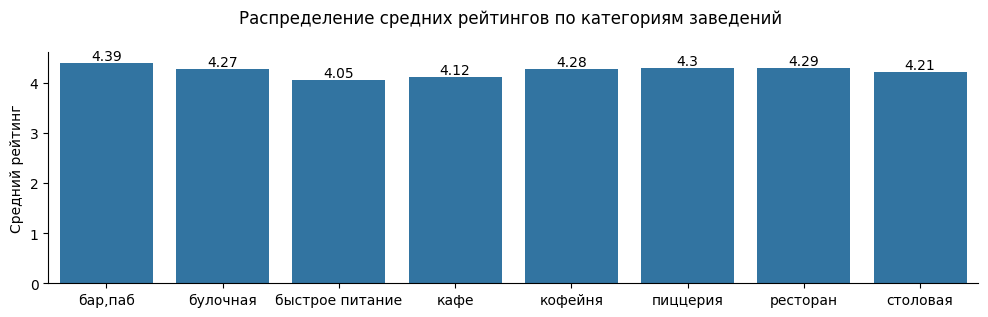

In [81]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(12, 3))

# Строим столбчатую диаграмму
bar_rating_category = sns.barplot(data=df_rating_category, x='category', y='rating')

# Настраиваем оформление графика:

# Скроем верхнюю и правую границы границу
bar_rating_category.spines[['top','right']].set_visible(False)

# Настраиваем оформление графика
plt.ylabel('Средний рейтинг')
plt.xlabel('')
plt.title('Распределение средних рейтингов по категориям заведений \n')

# Добавляем значения 
bar_rating_category.bar_label(bar_rating_category.containers[0])

# Выводим график
plt.show()

Несмотря на то, что в каждой категории присутствуют заведения с критически низкими рейтингами, в среднем значения рейтингов не опускаются ниже отметки 4 и находятся в интервале от 4.05 (быстрое питание) до 4.39 (для баров и пабов).

### Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений. Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Определим самую сильную связь и проверим её.

Данные содержат как числовые, так и категориальные переменные, поэтому воспользуемся коэффициентом `phi_k` и рассчитаем корреляцию:

In [82]:
# Строим матрицу корреляции
phik_df = df[['category', 'district', 'rating', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()
phik_df

interval columns not set, guessing: ['rating', 'seats']


,category,district,rating,chain,seats,price,is_24_7
category,1.000000,0.174474,0.198941,0.265532,0.045032,0.535511,0.251390
district,0.174474,1.000000,0.189389,0.064431,0.354791,0.213963,0.080894
rating,0.198941,0.189389,1.000000,0.119417,0.000000,0.242684,0.182855
chain,0.265532,0.064431,0.119417,1.000000,0.057473,0.207531,0.039361
seats,0.045032,0.354791,0.000000,0.057473,1.000000,0.105353,0.043245
price,0.535511,0.213963,0.242684,0.207531,0.105353,1.000000,0.086309
is_24_7,0.251390,0.080894,0.182855,0.039361,0.043245,0.086309,1.000000


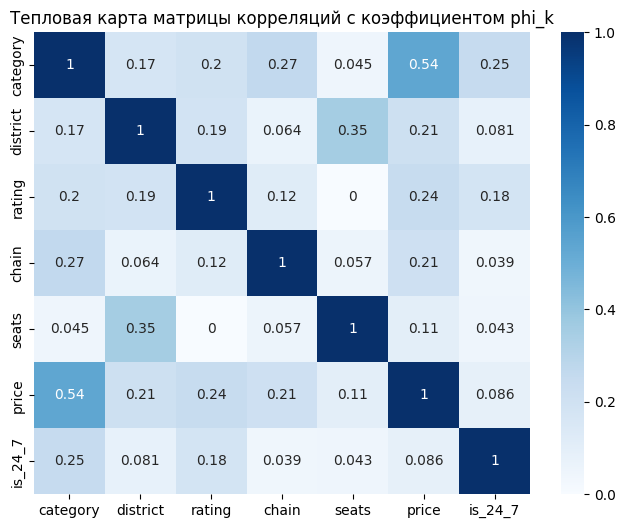

In [83]:
# Задаём размер графика
plt.figure(figsize=(8, 6))

# Создаём визуализацию
sns.heatmap(data=phik_df, annot=True, cmap='Blues')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций с коэффициентом phi_k')
plt.show()

Наибольшая корреляция наблюдается между категорией заведений и категорией цен (0,54). Однако в рамках задачи нас интересует критерий рейтинга'rating'.  
Корреляция рейтинга заведений 'rating' наблюдается с категорией цен в заведниях 'price' (0.24), с категорией заведений 'category' (0.2), c расположением 'district' (0.19), признаком 'is_24_7' (0.18) и критерием сетевое\несетевое 'chain' (0,12). Выберем самую сильную связь с 'price'  и поскольку данные могут демонстрировать случайную связь, необходимо убедится, что связь между данными действительно наблюдается и определить ее характер.  

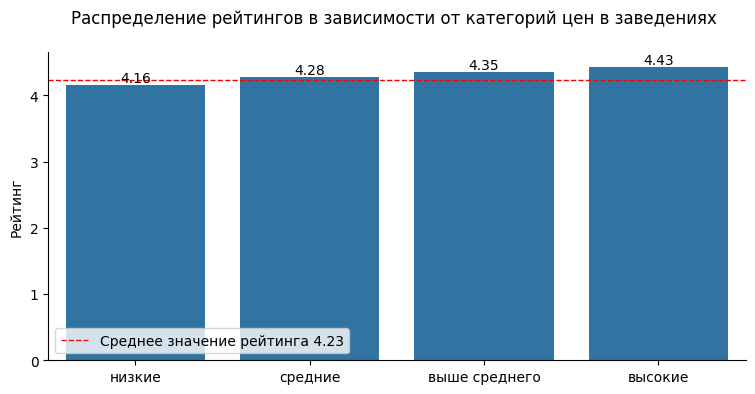

In [84]:
# Группируем данные по категории цен
grouped = df.groupby('price')['rating'].mean().sort_values().round(2).reset_index()

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(9, 4))

# Строим столбчатую диаграмму
bar_price_rating = sns.barplot(data=grouped, x='price', y='rating')

# Рассчитываем среднее значение рейтинга по всем данным
mean_rating = df['rating'].mean().round(2)

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_rating, color='red', linestyle='--', linewidth=1, label=f'Cреднее значение рейтинга {str(mean_rating)}')

# Настраиваем оформление графика:

# Скроем верхнюю и правую границы границу
bar_price_rating.spines[['top','right']].set_visible(False)

# Подписи осей и название
plt.ylabel('Рейтинг')
plt.xlabel('')
plt.title('Распределение рейтингов в зависимости от категорий цен в заведениях \n')

# Добавляем значения 
bar_price_rating.bar_label(bar_price_rating.containers[0])

# Добавляем легенду
plt.legend()

# Выводим график
plt.show()

На графике видно, что действительно наблюдается связь и чем выше категория цен в заведении, тем больше среднее значение рейтинга. Возможно это связано с качеством обслуживания.  
Для категории цены "низкие" рейтинг составляет 4,16, что на 1,6% ниже среднего значения рейтинга по всем данным.  
Для категории цены "средние" рейтинг составляет 4,28, что на 1,0% выше среднего значения рейтинга по всем данным.    
Для категории цены "выше среднего" рейтинг составляет 4,35, что на 2,8% выше среднего значения рейтинга по всем данным.    
Для категории цены "высокие" рейтинг составляет 4,43, что на 4,7% выше среднего значения рейтинга по всем данным.

### Найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга.

Создадим сводную таблицу и для каждого сети найдем количество заведений (посчитав адреса), найдем средний рейтинг для сети и самую частовстречающуюся категорию в каждой сети (для случаев если заведению приписали по ошибке другую категорию, например 'Шоколадница' - это 'кофейня', но по ошибке одному из заведений этой сети присвоили катаегорию 'кафе'). 

In [85]:
# Фильтруем данные и оставляем только сети
df_chain_true = df[df['chain']==True]

# Создаем словарь функций
aggfunc = {'address':'count',
           'rating':'mean',
           'category': lambda x: x.mode()}#.iat[0]} # находим самое частотное значение типа заведения
# Создаем сводную таблицу
tab = pd.pivot_table(df_chain_true, index=['name'], values=['address', 'rating', 'category'], aggfunc=aggfunc)

# Сбрасываем индексы, сортируем по количеству и выводим первые 15
tab_top_name = tab.sort_values(by='address', ascending = False).reset_index().head(15)

# Округляем значения рейтинга
tab_top_name['rating'] = tab_top_name['rating'].round(2)
tab_top_name

,name,address,category,rating
0,ШОКОЛАДНИЦА,120,кофейня,4.18
1,ДОМИНО'С ПИЦЦА,76,пиццерия,4.17
2,ДОДО ПИЦЦА,74,пиццерия,4.29
3,ONE PRICE COFFEE,71,кофейня,4.06
4,ЯНДЕКС ЛАВКА,69,ресторан,3.87
5,COFIX,65,кофейня,4.08
6,PRIME,50,ресторан,4.12
7,ХИНКАЛЬНАЯ,44,кафе,4.32
8,КОФЕПОРТ,42,кофейня,4.15
9,КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ,39,кафе,4.39


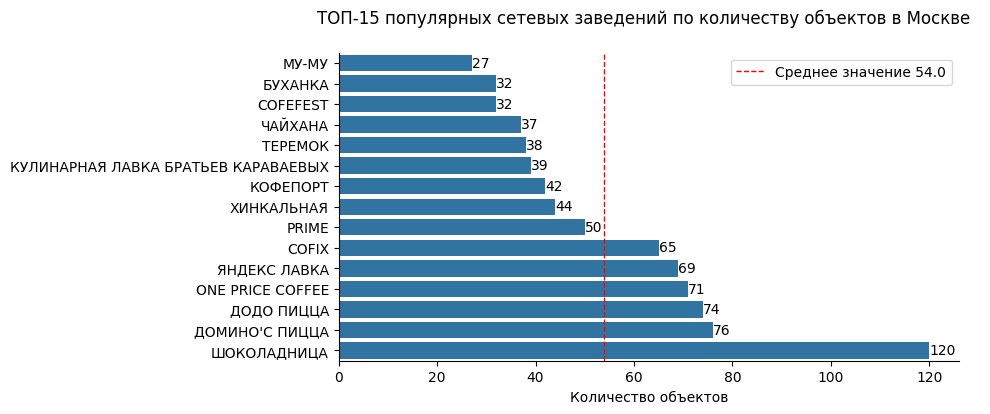

In [86]:
# Отсортируем по убыванию
tab_sort = tab_top_name.sort_values(by='address', ascending = True)

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(8,4))

# Строим столбчатую диаграмму
bar_top_count = sns.barplot(data=tab_sort, x='address', y='name')

# Рассчитываем среднее значение количества объектов в сети
mean_object = tab_top_name['address'].mean().round(0)

# Наносим на график вертикальную линию с средним значением количества объектов в сети
plt.axvline(mean_object, color='red', linestyle='--', linewidth=1, label=f'Cреднее значение {mean_object}')

# Настраиваем оформление графика:
# Скрываем верхнюю и правую границы
bar_top_count.spines[['top', 'right']].set_visible(False)
# Добавляем значения 
bar_top_count.bar_label(bar_top_count.containers[0])
# Название и оси
plt.title('ТОП-15 популярных сетевых заведений по количеству объектов в Москве  \n')
plt.xlabel('Количество объектов')
plt.ylabel('')
# Выводим легенду
plt.legend()

# Выводим график
plt.show()

Посмотрим к каким категориям относятся заведения 15 популярных сетей и выведем долю каждой категории

In [87]:
tab_top_category = tab_top_name['category'].value_counts(normalize=True).round(2)
tab_top_category = tab_top_category.reset_index()
tab_top_category 

,category,proportion
0,кофейня,0.33
1,кафе,0.27
2,ресторан,0.20
3,пиццерия,0.13
4,булочная,0.07


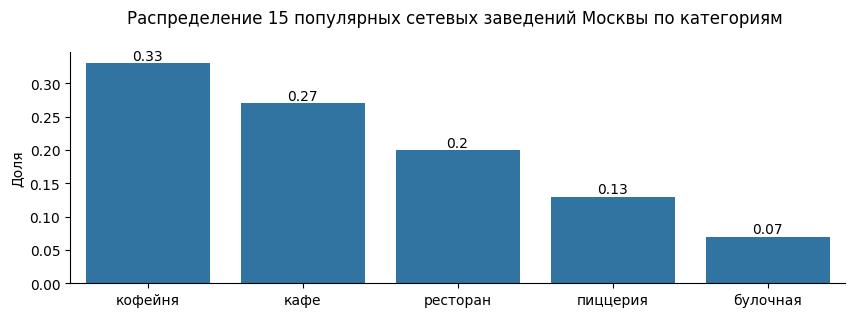

In [92]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10,3))

# Строим столбчатую диаграмму
bar_top_category = sns.barplot(data=tab_top_category, x='category', y='proportion')

# Настраиваем оформление графика:
# Скроем верхнюю и правую границы
bar_top_category.spines[['top','right']].set_visible(False)
# Добавляем значения 
bar_top_category.bar_label(bar_top_category.containers[0])
# Подписываем оси и название
plt.title('Распределение 15 популярных сетевых заведений Москвы по категориям \n')
plt.ylabel('Доля')
plt.xlabel('')
plt.xticks(rotation=0)
# Выводим график
plt.show()

В топ-15 самых популярных сетей Москвы вошли сети с количеством заведений в них от 27 до 120, в среднем 54 заведения на сеть.
Самое большое количество заведений в сети имеют кофейня 'ШОКОЛАДНИЦА'	- 120,	остальные существенно меньше филиалов от 76 и ниже.
33% самых полулярных сетевых заведений Москвы это кофейни. Чуть меньше 27% приходится на кафе. 20% -рестораны. 13% - пиццерии. И всего 7% - это булочные.

### Изучим вариацию среднего чека заведения в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Определим как удалённость от центра влияет на цены в заведениях.

Напомним, что столбец содержит одно нулевое значение. При расчетах его нужно отфильтровать.

In [93]:
#Сгруппируем по району и посмотрим статистики
df[df['middle_avg_bill'] > 0].groupby('district')['middle_avg_bill'].describe(percentiles=[0.05, 0.25, 0.75, 0.95])

,count,mean,std,min,5%,25%,50%,75%,95%,max
district,,,,,,,,,,
Восточный,260.0,820.626953,850.903503,50.0,225.0,338.00,575.0,1100.0,2005.0,10000.0
Западный,306.0,1053.225464,779.008423,50.0,250.0,427.50,1000.0,1500.0,2500.0,5250.0
Северный,322.0,927.959656,912.608765,130.0,225.0,350.00,650.0,1250.0,2250.0,11000.0
Северо-Восточный,301.0,716.611267,591.232117,50.0,200.0,325.00,500.0,950.0,1800.0,4500.0
Северо-Западный,157.0,822.222900,595.055176,120.0,212.0,340.00,700.0,1100.0,2000.0,2900.0
Центральный,1059.0,1192.182251,919.718994,67.0,274.5,500.00,1000.0,1500.0,2750.0,7250.0
Юго-Восточный,194.0,654.097961,566.825684,30.0,150.0,281.25,450.0,887.5,1517.5,3750.0
Юго-Западный,235.0,792.561707,559.173035,100.0,193.5,350.00,600.0,1100.0,2000.0,2750.0
Южный,314.0,834.398071,2008.639160,100.0,200.0,350.00,500.0,1037.5,1717.5,35000.0


- Посмотрим распределение цен в Центральном округе:

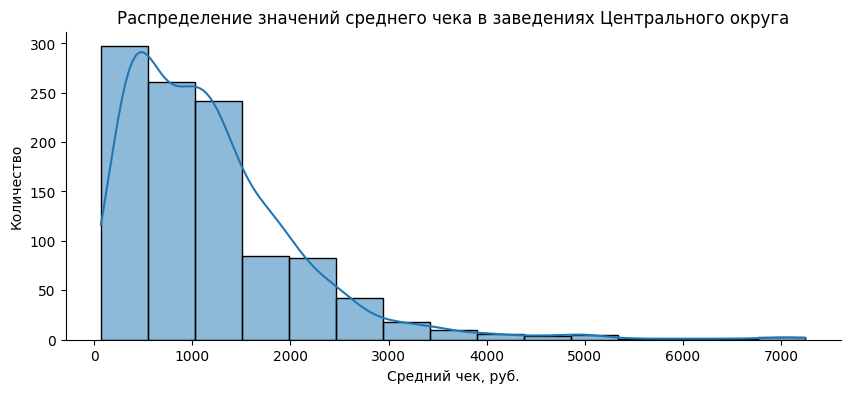

In [94]:
centre_avg_check = df[(df['district']=='Центральный') & (df['middle_avg_bill'] > 0)]

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10,4))

# Построим распределение данных
hist_centre_avg_check = sns.histplot(data=centre_avg_check, x='middle_avg_bill', bins=15, kde=True)

# Настраиваем оформление графика:
# Скроем верхнюю и правую границы
hist_centre_avg_check.spines[['top','right']].set_visible(False)

# Подписываем и отображаем график
plt.title('Распределение значений среднего чека в заведениях Центрального округа')
plt.ylabel('Количество')
plt.xlabel('Средний чек, руб.')
# Выводим график
plt.show()

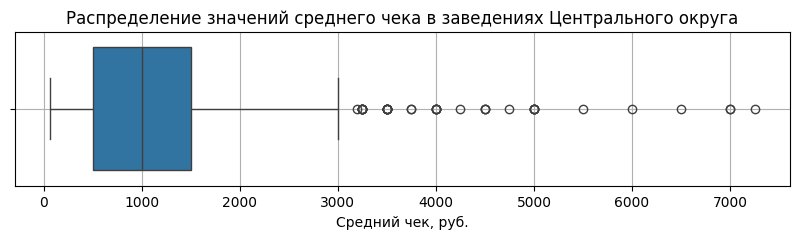

In [95]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10,2))
# Строим горизонтальную диаграмму размаха
box_centre_avg_check = sns.boxplot(centre_avg_check, x='middle_avg_bill', vert=False)

# Добавляем заголовок и подписи
plt.title('Распределение значений среднего чека в заведениях Центрального округа')
plt.xlabel('Средний чек, руб.')
plt.ylabel('')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()

Данные имеют широкий размах, разбос цен от 67 до 7250. Нижняя граница слишком низкая и требует дополнительного анализа. Вероятно значения в столбце со средним чеком занижены, поскольку сюда могли попасть значения 'от', то есть значения среднего чека по нижней границе.  

В задаче 2 мы рассматривали распределение категорий заведений в Центральном округе:
- на рестораны приходится 30% заведений
- на кафе - 21%
- на кофейни - 19%
- на бары и пабы - 16%
- на пиццерии - 5%
- на быстрое питание - 4%
- на столовые - 3% и на булочные 2%

Таким образом, в Центральном районе представлены заведения всех категория и в большей степени это рестораны. Вероятно поэтому на графике мы наблюдаем длинный правый хвост с значениями значительно превышающими остальные. Судя по графику, значения свыше примерно 3000руб можно отнести к аномальным. Ниже проверим, что этот перекос в данных связан с ресторанами.

25% заведений Центрального округа имеют значения среднего чека ниже 500 руб, вероятно это связано с присутствием в центральном округе булочных, столовых и быстрого питания.  
50% данных сосредоточены вокруг медианы и находятся в интервале от 500 до 1500 руб.

Проверим какие заведения Центрального округа имеют средний чек, превышающий 3000 руб.

In [96]:
# Отфильтруем датафрейм по округу и среднему чеку от 3000
# Получим статистику по всем столбцам
df[(df['district']=='Центральный') & (df['middle_avg_bill']>3000)].describe(include='object')

,name,category,address,district,hours,price,avg_bill,is_24_7
count,39,39,39,39,39,39,39,39
unique,39,3,39,1,18,2,23,2
top,КРАБЫКУТАБЫ,ресторан,"Москва, Лесная улица, 20, стр. 4",Центральный,"ежедневно, 12:00–00:00",высокие,Средний счёт:3000–3500 ₽,False
freq,1,30,1,39,16,38,5,38


В Центральном округе 39 заведений имеют средний чек выше 3000 руб. При этом в 30 случаях из 39 - это рестораны. Наша гипотеза подтвердилась.

- Чтобы узнать как удалённость от центра влияет на цены в заведения проанализируем значения среднего чека для каждого округа, а также средний чек Центрального округа и средний чек по остальным округам.

Найдем для каждого округа значение среднего чека:

In [97]:
# Сгруппируем данные по районам, для каждого найдем среднее значение чека, округлим до рублей
district_avg_check = df[df['middle_avg_bill'] > 0].groupby('district')['middle_avg_bill'].mean().round(0).reset_index().sort_values(by='middle_avg_bill', ascending = True)
district_avg_check

,district,middle_avg_bill
6,Юго-Восточный,654.0
3,Северо-Восточный,717.0
7,Юго-Западный,793.0
0,Восточный,821.0
4,Северо-Западный,822.0
8,Южный,834.0
2,Северный,928.0
1,Западный,1053.0
5,Центральный,1192.0


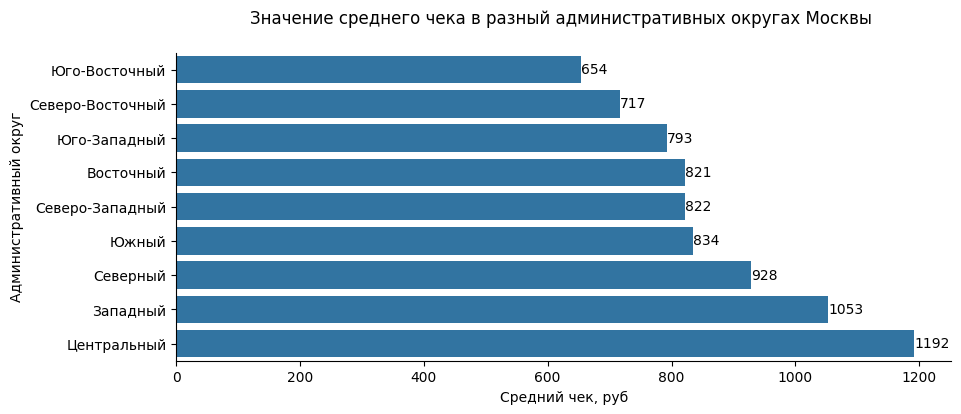

In [98]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10,4))

# Строим столбчатую диаграмму
bar_district_avg_check = sns.barplot(data=district_avg_check, y='district', x='middle_avg_bill')

# Настраиваем оформление графика:
# Скроем верхнюю и правую границы
bar_district_avg_check.spines[['top','right']].set_visible(False)
# Добавляем значения 
plt.bar_label(bar_district_avg_check.containers[0])

# Подписываем и отображаем график
plt.title('Значение среднего чека в разный административных округах Москвы \n')
plt.ylabel('Административный округ')
plt.xlabel('Средний чек, руб')
# Выводим график
plt.show()

На диаграмме видно, что значения средних чеков зависят от места расположения заведений. В целом по Москве средний чек колеблется от 654 руб для Юго-Восточного района и до 1192 руб. для Центрального района, что ожидаемо. Центральный район сосредоточен вокруг центра - это может объяснить 1 место в рейтинге. Но поскольку административные округа расположены вокруг Центрального, сложно определить расположен ли один округ дальше, чем другой относительно Центрального округа. Хотя у Западного округа часть территории (район Дорогомилово) находится ближе к центру Москвы - это может объяснить 2 место в рейтинге по среднему чеку.  
Однако с уверенностью сказать, что средний чек зависит от удаленности невозможно. Скорее всего влияние на средний чек оказывают еще какие-то факторы, например наличие элитных жилых комплексов, популярность района или количество парков отдыха и т.д. Единственное, что можно сказать с уверенностью - это средний чек в Центральном округе выше остальных. 

Сравним средний чек Центрального окурга со средним чеком остальных округов

In [99]:
# Функция категоризации 
def categorize_district(row):
    if row == 'Центральный':
         return 'Центральный'
    else:
        return 'Остальные'
# Cоздаем столбец с новыми категориями        
df['district_group'] = df['district'].apply(categorize_district)

In [100]:
# Сгруппируем данные и найдем среднее значение среднего чека
df_district_group = df[df['middle_avg_bill']>0].groupby('district_group')['middle_avg_bill'].mean().round(0).reset_index()
df_district_group 

,district_group,middle_avg_bill
0,Остальные,840.0
1,Центральный,1192.0


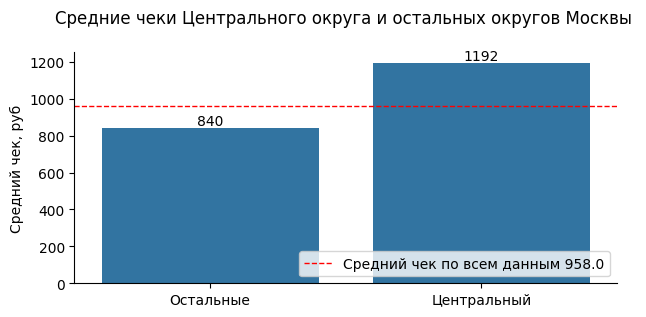

In [101]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(7,3))

# Строим столбчатую диаграмму
bar_district_group = sns.barplot(data=df_district_group, x='district_group', y='middle_avg_bill')

# Рассчитываем средний чек по всем данным
avg_check_all = df['middle_avg_bill'].mean().round(0)

# Наносим на график линию с средним значением
plt.axhline(avg_check_all, color='red', linestyle='--', linewidth=1, label=f'Cредний чек по всем данным {str(avg_check_all)}')


# Настраиваем оформление графика:
# Скроем верхнюю и правую границы
bar_district_group.spines[['top','right']].set_visible(False)
# Добавляем значения 
plt.bar_label(bar_district_group.containers[0])
# Добавляем легенду
plt.legend(loc=4)
# Подписываем и отображаем график
plt.title('Средние чеки Центрального округа и остальных округов Москвы \n')
plt.xlabel('')
plt.ylabel('Средний чек, руб')
# Выводим график
plt.show()
 

Средний чек заведений Центрального округа в среднем больше на 352 руб (на 42%), чем средний чек в остальных округах. При этом средний чек Центрального округа в среднем на 25% больше среднего чека по всем данным, а средний чек остальных округов в среднем меньше на 12% среднего чека по всем данным. 

### Проведем исследования других данных и их взаимосвязи: часы работы заведений, стоимость чашки кофе в зависимости от расположения или типа заведения.

Рассмотрим взаимосвязь между  режимом работы и расположением заведения. Найдем абсолютные и относительный значения круглосуточных и некруглосуточных заведений.

In [102]:
# Считаем количество круглосуточных и некруглосуточных заведений по всем данным
df['is_24_7'].value_counts()#.round(2)

is_24_7
False    7096
True      772
Name: count, dtype: int64

In [103]:
# Считаем долю круглосуточных и некруглосуточных заведений по всем данным
df['is_24_7'].value_counts(normalize=True).round(2)

is_24_7
False    0.9
True     0.1
Name: proportion, dtype: float64

Посмотрим как распределены круглосуточные заведения по округам Москвы:

In [104]:
# Получаем долю круглосуточных заведений от общего числа круглосуточных для каждого округа
district_is_24_7 = df.groupby('is_24_7')['district'].value_counts(normalize=True).round(2).reset_index()
district_24_7 = district_is_24_7[district_is_24_7['is_24_7']== True]
district_24_7

,is_24_7,district,proportion
9,True,Центральный,0.20
10,True,Восточный,0.13
11,True,Юго-Восточный,0.12
12,True,Северо-Восточный,0.10
13,True,Западный,0.10
14,True,Южный,0.10
15,True,Северный,0.10
16,True,Юго-Западный,0.10
17,True,Северо-Западный,0.06


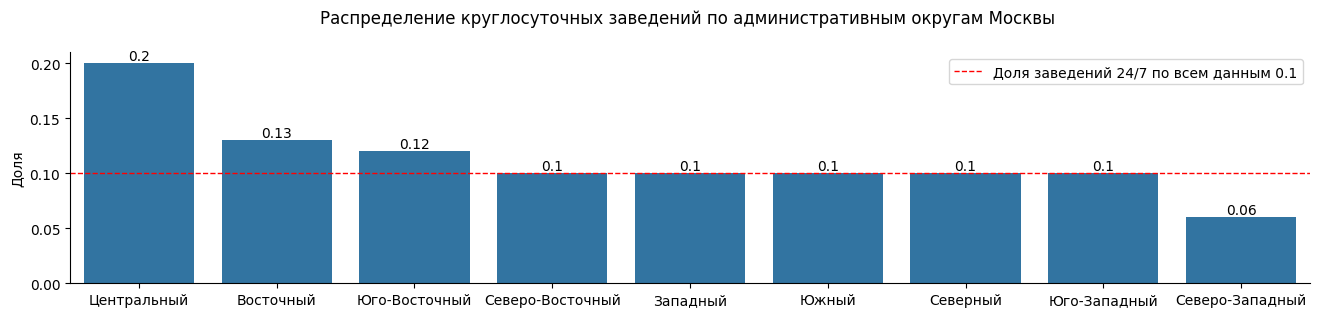

In [105]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(16,3))

# Строим столбчатую диаграмму
bar_district_24_7 = sns.barplot(data=district_24_7, x='district', y='proportion')

# Считаем долю круглосуточных заведений по всем данным
k = df['is_24_7'].value_counts(normalize=True).round(2)
k = k.iloc[1]

# Наносим на график линию с средним значением рейтинга
plt.axhline(k, color='red', linestyle='--', linewidth=1, label=f'Доля заведений 24/7 по всем данным {k}')

# Настраиваем оформление графика:
# Скроем верхнюю и правую границы
bar_district_24_7.spines[['top','right']].set_visible(False)
# Добавляем значения 
plt.bar_label(bar_district_24_7.containers[0])
# Добавляем легенду
plt.legend(loc=1)
# Подписываем оси и название
plt.title('Распределение круглосуточных заведений по административным округам Москвы \n')
plt.ylabel('Доля')
plt.xlabel('')
plt.xticks(rotation=0)
# Выводим график
plt.show()

Как видно на графике, на Центральный округ приходится 20% заведений 24/7 от общего числа круглосуточных. На остальные приходится от 6% до 13%. Доли Центрального, Восточного и Юго-Восточного округа выше среднего значения по всем данным. Доля Северо-Западного округа ниже среднего. Остальные имеют долю на уровне среднего.

Посмотрим соотношение круглосуточных и некруглосуточных заведений внутри каждого округа:

In [106]:
# Получим данные для каждого округа по количеству круглосуточных заведений и некруглосуточных
district_hours = pd.pivot_table(df, columns='is_24_7', index='district', values='name', aggfunc='count').reset_index()
district_hours =  district_hours.set_axis(['district', 'count_f', 'count_t'], axis=1)
district_hours

,district,count_f,count_t
0,Восточный,624,99
1,Западный,708,77
2,Северный,771,74
3,Северо-Восточный,750,79
4,Северо-Западный,324,45
5,Центральный,2059,152
6,Юго-Восточный,534,95
7,Юго-Западный,576,74
8,Южный,750,77


In [107]:
# Посчитаем доли
district_hours['share_false'] = (district_hours['count_f'] * 100 / (district_hours['count_f'] + district_hours['count_t'])).round(1)
district_hours['share_true'] = (district_hours['count_t'] * 100 / (district_hours['count_f'] + district_hours['count_t'])).round(1)
district_hours = district_hours.sort_values(by='share_true')
district_hours

,district,count_f,count_t,share_false,share_true
5,Центральный,2059,152,93.1,6.9
2,Северный,771,74,91.2,8.8
8,Южный,750,77,90.7,9.3
3,Северо-Восточный,750,79,90.5,9.5
1,Западный,708,77,90.2,9.8
7,Юго-Западный,576,74,88.6,11.4
4,Северо-Западный,324,45,87.8,12.2
0,Восточный,624,99,86.3,13.7
6,Юго-Восточный,534,95,84.9,15.1


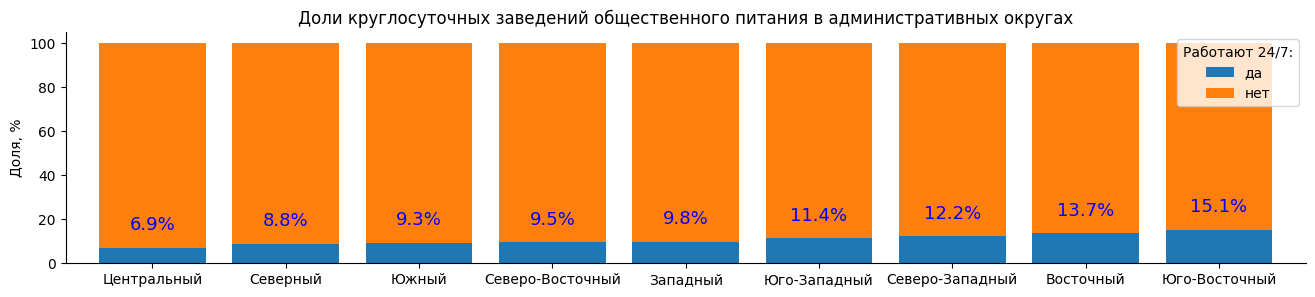

In [108]:
# Строим диаграмму
bar_district_hours = district_hours.plot(x='district', y=['share_true', 'share_false'] , kind='bar', stacked=True, figsize=(16, 3), width=0.8)

# Задаем подписи осей и название
plt.ylabel('Доля, %')
plt.xlabel('')
plt.xticks(rotation=0)
plt.title('Доли круглосуточных заведений общественного питания в административных округах')
plt.legend(['да', 'нет'], title='Работают 24/7:', loc=1)

# Добавляем значения к барам
#plt.bar_label(bar_district_hours.containers[0])
plt.bar_label(bar_district_hours.containers[0], padding=10, color='blue', size=13, fmt='%.1f%%')

# Убираем верхнюю и правую границы
bar_district_hours.spines[['top','right']].set_visible(False)

# Выводим график
plt.show()

Доли заведений работающих круглосуточно для каждого из округов невысокие и варьируются от 6,9% до 15,1%. В силу того, что количество заведений по округам не однородно, доля круглосуточных в Центральном округе хоть и составляет всего 6,9%, но их абсолютное количество 152, что больше чем в любом другом округе.

На Центральный округ приходится больше всего заведений 24/7, однако их доля от остальных заведений незначительна и составляет 6,9% (152 заведения). В целом количество круглосуточных заведений в Центрально округе больше в 2 раза, чем в других округах.

### Промежуточный вывод

В данных преобладает информация о заведениях Центрального округа, их доля составляет 27%  
Большинство заведений - это рестораны, их доля от общего числа 30%.  
Самые распространенные заведения Центрального округа - рестораны, всех остальных округов - кафе.  
Средний чек заведений Центрального округа в среднем выше на 42%, чем средний чек в остальных округах.  
Заведения с более высокими ценами имеют рейтинг выше среднего. Самый высокий средний рейтинг имеют бары и пабы - 4.39.  
Доля круглосуточных заведений очень низкая порядка 10%.  
Самые популярные сетевые заведения представлены в таких категориях: ресторан, кафе, кофейны, пиццерия, булочная. Среднее количество заведенй в сети - 54.

 В Москве больше 30 тысяч заведений общественного питания, а наша выборка содержит 8403, что составляет лишь 28%. Поэтому к полученным в результате исследования выводам необходимо относится с осторожностью. Усугубляют ситуацию наличие ошибок в данных и большое количество пропусков. Кроме того, данных явно недостаточно для более качественного анализа.  Например, для определения самых популярных заведений лучше бы подошли данные по количеству чеков или посещаемость заведения. А наличие геоданных помогло бы визуально оценить распределение заведений по округам и определить неохваченные места. Данные половозрастной структуры среднестатистического клиента каждого заведения позволили бы определить предпочтения клиентов и определиться с категорией заведения и оптимальным режимом работы.

## Итоговый вывод и рекомендации

Основная цель исследования заключалась в том, чтобы провести исследовательский анализ исходных данных рынка заведений общественного питания Москвы и ответить на ряд вопросов:
- изучить какие категории заведений представлены в данных о определить количество объектов общественного питания по каждой из них
- изучить какие административные районы Москвы присутствуют в данных и исследовать распределение количества заведений по ним, отдельно проанализировать распределение заведений каждой категории в Центральном административном округе Москвы.
- изучите соотношение сетевых и несетевых заведений и определить какие категории заведений чаще являются сетевыми
- исследовать количество посадочных мест в заведениях и определить для каждой категории заведений наиболее типичное количество посадочных мест
- исследовать рейтинг заведений по категориям заведений.
- изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений и проверить самую сильную связь.
- определить топ-15 популярных сетей в Москве
- изучить вариацию среднего чека заведения в зависимости от района Москвы и определить как удалённость от центра влияет на цены в заведениях.

В ходе исследования проанализировали данные 8403 сетевых и несетевых заведений общественного питания Москвы. Данные включали основную информацию о заведениях такую как название, категория, локацию, режим работы, а также категорию цен, данные среднего чека и оценки клиентов. Результаты исследовани должны помочь инвесторам определиться с типом заведения и выбрать оптимальное место в Москве для его открытия.

На осноаве исследовательского анализа сделаны следующие выводы:
1. В Москве представлены 8 категорий заведений общественного питания:
    - 28% (2377) - кафе,
    - 24% (2041) - ресторан,
    - 17% (1413) - кофейни,
    - 9% (765) - бары и пабы,
    - 8% (633) - пиццерии,
    - 6% (603) - быстрое питание,
    - 4% (315) - столовые,
    - 3% (256) - булочные.

2. Заведения общественного питания расположенны в 9 административных районах. Распределение заведений по округам:
    - Центральный округ - 27% (2242 заведений);
    - Северный - 11% (899 заведений);
    - Южный  11% (892 заведений);
    - Северо-Восточный  11% (890 заведений);
    - Западный - 10% (850 заведений);
    - Восточный - 9% (798 заведений);
    - Юго-Западный - 8% (709 заведений);
    - Юго-Восточный - 8% (714 заведений);
    - Северо-Западный -5% (409 заведений).

В Центральном округе представлены заведения всех категорий:
    - доля ресторанов - 30%;
    - суммарная доля кафе, кофеен - 40%;
    - доля баров и пабов 16%;
    - остальные 14% разделяют пиццерии, быстрое питание, столовые и булочные.

3. Доля сетевых заведений составляет 38% (3205), доля несетевых - 62% (5198). Для категории "булочная" преобладает количество сетевых заведений, их больше на 59%, чем несетевых. Для 'пиццерий' - сетевых заведений больше на 9%, чем несетевых. А для 'кофеен' - на 4%. Общее количество сетевых заведений 3205, при этом количество сетей 747, примерно по 4 заведения нас сеть.
   
5. Среднее типичное количество посадочных мест по всем категориям заведений - порядка 78. В разрезе категорий это значение варьируются от 52 до 90 мест:
    - рестораны (90), бары, пабы (84) имеют количество посадочных мест несколько больше, а именно от 8% до 15 %, чем в среднем по всем данным;
    - кофейни (80), столовые (80) и быстрое питание (75) - на уровне среднего по всем данным;
    - Для кафе (60), пиццерий (56)  и булочных (52) количество посадочных мест на 20%-33% ниже, чем в среднем по всем данным.
 
5. Средние значения рейтингов в разрезе категорий не опускаются ниже отметки 4 и находятся в интервале от 4.05 (быстрое питание) до 4.39 (для баров и пабов).
6. Существуют связь между рейтингом и категории цены заведения: чем выше категория цен в заведении, тем больше среднее значение рейтинга.
7. ТОП-15 сетей Москвы:
|№|Название сети|Количество|Рейтинг| 
|---|-------------|-----|---|  
|1|	ШОКОЛАДНИЦА|120	|4.18|
|2|ДОМИНО'С ПИЦЦА	|76	|4.17|
|3|ДОДО ПИЦЦА	|74|4.29|
|4|ONE PRICE COFFEE|71|4.06|
|5|ЯНДЕКС ЛАВКА|69|3.87|
|6|COFIX|	65|4.08|
|7|PRIME|50	|4.12|
|8|ХИНКАЛЬНАЯ|44|4.32|
|9|КОФЕПОРТ|42|4.15|
|10|КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ|39|4.39|
|11|ТЕРЕМОК|38|4.12|
|12|ЧАЙХАНА|37|3.92|
|13|БУХАНКА|32	|4.40|
|14|COFEFEST|32|3.98|
|15|МУ-МУ|27|4.23|


В топ-15 33% самых полулярных сетевых заведений города Москвы это кофейни. Чуть меньше 27% приходится на кафе. 20% - рестораны. 13% - пиццерии. И всего 7% - это булочные.

8. Средний чек заведений Центрального округа составляеи 1192 руб , что в среднем на 42% выше, чем средний чек в заведениях остальных округов - 840 руб.

В качестве рекомендаций стоит обратить внимание на округи Москвы с наименьшей концентрацией заведений общественного питания, например  Юго-Западный, Юго-Восточный или Северо-Западный. Чтобы избежать конкуренции, лучше рассматривать категории заведений отличные от самой многочисленной категории "кафе". Можно рассмотреть вариант сетевого заведения в нескольких округах Москвы (кроме Центрального) для более широкого охвата. Или рассмотреть варианты круглосуточных заведений, например в Северо-Западном округе, где абсолютное количество таких заведений самое низкое (45). При этом возможно потребуется дополнительное исследование платежеспособности населения для выбора оптимальной категории заведения.

-----------------------------------